In [2]:
#FINAL Rough FRAMEWORK

In [6]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import csv

class CSVViewer:
    def __init__(self, master):
        self.master = master
        self.frame = ttk.Frame(master)
        self.frame.pack(fill="both", expand=True)

        # Create a Treeview widget to display CSV data
        self.tree = ttk.Treeview(self.frame)
        self.tree["columns"] = ("#1", "#2", "#3")  # Adjust number of columns as needed
        self.tree.pack(expand=True, fill="both")

        # Add column headings
        self.tree.heading("#0", text="Row #")
        for i in range(1, len(self.tree["columns"]) + 1):
            self.tree.heading(f"#{i}", text=f"Column {i}")

        self.create_buttons()

    def create_buttons(self):
        csv_files = {
            "High": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\High.csv",
            "Low": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\Low.csv",
            "Net Growth": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\netgrowth.csv",
            "Button 4.csv": "path_to_file.csv",  # Replace "path_to_file.csv" with the actual file path
            "Button 5.csv": "path_to_file.csv",  # Replace "path_to_file.csv" with the actual file path
            "Button 6.csv": "path_to_file.csv",  # Replace "path_to_file.csv" with the actual file path
            "Button 7.csv": "path_to_file.csv",  # Replace "path_to_file.csv" with the actual file path
            "Button 8.csv": "path_to_file.csv",  # Replace "path_to_file.csv" with the actual file path
        }

        button_frame = ttk.Frame(self.frame)
        button_frame.pack()

        for text, path in csv_files.items():
            button = ttk.Button(button_frame, text=text, command=lambda p=path: self.display_csv(p), style="My.TButton")
            button.pack(side="left", padx=5, pady=5)

    def display_csv(self, filename):
        try:
            # Load CSV data
            with open(filename, newline="") as csvfile:
                reader = csv.reader(csvfile)
                data = list(reader)

            # Clear existing data in the Treeview
            for item in self.tree.get_children():
                self.tree.delete(item)

            # Insert CSV data into the Treeview
            for i, row in enumerate(data):
                self.tree.insert("", tk.END, text=i+1, values=row)

        except Exception as e:
            messagebox.showerror("Error", f"Failed to load CSV file: {e}")

class ImageApp:
    def __init__(self, master):
        self.master = master
        self.frame = ttk.Frame(master)
        self.frame.pack(fill="both", expand=True)

        # Create a frame for buttons
        self.button_frame = ttk.Frame(self.frame)
        self.button_frame.pack(side="left", fill="y")

        # Create buttons for showing images
        self.image_filenames = ["C:\\Users\\Samrudhi\\Desktop\\imppp.png", "C:\\Users\\Samrudhi\\Downloads\\rip.jpg", "C:\\Users\\Samrudhi\\Pictures\\example.jpg", "C:\\Users\\Samrudhi\\Pictures\\image1.jpg", "C:\\Users\\Samrudhi\\Pictures\\image2.jpg", "C:\\Users\\Samrudhi\\Pictures\\image3.jpg", "C:\\Users\\Samrudhi\\Pictures\\image4.jpg", "C:\\Users\\Samrudhi\\Pictures\\image5.jpg"]  # Add more image file paths here
        for idx, filename in enumerate(self.image_filenames):
            if idx == 0:  # Renaming the first button to "Net Growth"
                btn_text = "Net Growth"
            elif idx==1:
                btn_text= "Yearly Data"
            else:
                btn_text = f"Show Image {idx-1}"
            btn = ttk.Button(self.button_frame, text=btn_text, command=lambda f=filename: self.show_image(f), style="My.TButton")
            btn.pack(fill="x", pady=5)

        # Add exit button aligned to the bottom right corner
        self.exit_button = ttk.Button(self.frame, text="Exit", command=master.quit, style="Red.TButton")
        self.exit_button.place(relx=1.0, rely=1.0, anchor="se", x=-10, y=-10)  # Adjusted x and y coordinates

        # Initialize image label
        self.img_label = None

    def show_image(self, filename):
        try:
            img = Image.open(filename)
            img = img.resize((600, 600))
            photo = ImageTk.PhotoImage(img)

            if self.img_label:
                self.img_label.pack_forget()

            self.img_label = tk.Label(self.frame, image=photo)
            self.img_label.image = photo
            self.img_label.pack()

            # Close the image when clicked on it
            self.img_label.bind("<Button-1>", lambda event: self.img_label.pack_forget())
        except FileNotFoundError:
            messagebox.showerror("Error", "Image not found!")

    def open_image(self):
        filename = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if filename:
            self.show_image(filename)
            
class TextViewer:
    def __init__(self, master):
        self.master = master
        self.frame = ttk.Frame(master)
        self.frame.pack(fill="both", expand=True)

        # Create buttons for displaying images
        self.create_buttons()

    def create_buttons(self):
        # Define button texts and corresponding image file paths
        button_info = [
            ("Button 1", "image1.png"),
            ("Button 2", "image2.png"),
            ("Button 3", "image3.png")
        ]

        # Create buttons dynamically
        for text, image_path in button_info:
            btn = ttk.Button(self.frame, text=text, style="My.TButton", command=lambda path=image_path: self.show_image(path))
            btn.pack(side="top", anchor="w", padx=5, pady=5)

    def show_image(self, image_path):
        try:
            # Open image and display it
            img = Image.open(image_path)
            img = img.resize((600, 600))
            photo = ImageTk.PhotoImage(img)

            # Create a label to display the image
            image_label = tk.Label(self.master, image=photo)
            image_label.image = photo
            image_label.pack()

            # Bind a click event to close the image when clicked
            image_label.bind("<Button-1>", lambda event: image_label.pack_forget())
        except FileNotFoundError:
            messagebox.showerror("Error", "Image not found!")



def main():
    root = tk.Tk()
    root.title("PP PROJECT")

    style = ttk.Style(root)
    style.configure("My.TButton", background="#4CAF50", foreground="black", relief="ridged", font=("Arial", 12, "bold"))
    style.configure("Red.TButton", background="#f44336", foreground="black", relief="ridged", font=("Arial", 12, "bold"))

    notebook = ttk.Notebook(root)
    notebook.pack(fill="both", expand=True)

    page1 = CSVViewer(notebook)
    notebook.add(page1.frame, text='DATA')

    page2 = ImageApp(notebook)
    notebook.add(page2.frame, text='DATA VISULIZATION')

    page3 = TextViewer(notebook)
    notebook.add(page3.frame, text='ANALYSIS')

    root.mainloop()

if __name__ == "__main__":
    main()


In [ ]:
# COMPLETE CODE BELOW:

In [1]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk
import csv


class CSV_data:
    def __init__(self, master):
        self.master = master
        self.frame = ttk.Frame(master)
        self.frame.pack(fill="both", expand=True)

       
        self.tree = ttk.Treeview(self.frame)
        self.tree["columns"] = ("#1", "#2", "#3", "#4", "#5", "#6", "#7")  # Adjust number of columns as needed
        self.tree.pack(expand=True, fill="both")

        self.tree.heading("#0", text="Row #")
        for i in range(1, len(self.tree["columns"]) + 1):
            self.tree.heading(f"#{i}", text=f"Column {i}")

        self.create_buttons()

        self.create_additional_buttons()

    def create_buttons(self):
        csv_files = {
            "Netgrowth of Set 1": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_NET INCOME GROWTH.csv",
            "Highest of Year for set 1": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_HIGH.csv",
            "Lowest of Year for set 1": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_LOW.csv",
            "Maximum of each day for set 1": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_MAX.csv",
            "Minimum of each day for set 1": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_MIN.csv",
            "Shares of Praj": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PRAJ PIE.csv",
            "Shares of Prakash": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PRAKASH PIE.csv",
            "Shares of Tata Coffee": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\TATA PIE.csv",
        }

        button_frame = ttk.Frame(self.frame)
        button_frame.pack()

        for text, path in csv_files.items():
            button = ttk.Button(button_frame, text=text, command=lambda p=path: self.display_csv(p), style="My.TButton")
            button.pack(side="left", padx=3, pady=3)

    def create_additional_buttons(self):
        additional_buttons = {
            "Netgrowth of Set 2": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\netgrowth.csv",
            "Highest of Year for set 2": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\High.csv",
            "Lowest of Year for set 2": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\Low.csv",
            "Maximum of each day for set 2": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\MAX.csv",
            "Minimum of each day for set 2": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\MIN.csv",
            "Shares of Reliance": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\Reliance pie.csv",
            "Shares of Wipro": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\WIPRO pie.csv",
            "Shares of TVS": "C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\TVS pie.csv",
        }

        additional_button_frame = ttk.Frame(self.frame)
        additional_button_frame.pack()

        for text, path in additional_buttons.items():
            button = ttk.Button(additional_button_frame, text=text, command=lambda p=path: self.display_csv(p), style="My.TButton")
            button.pack(side="left", padx=3, pady=3)

    def display_csv(self, filename):
        try:
            with open(filename, newline="") as csvfile:
                reader = csv.reader(csvfile)
                data = list(reader)

            for item in self.tree.get_children():
                self.tree.delete(item)

            for i, row in enumerate(data):
                self.tree.insert("", tk.END, text=i + 1, values=row)

        except Exception as e:
            messagebox.showerror("Error", f"Failed to load CSV file: {e}")


class data_visualize:
    def __init__(self, master):
        self.master = master
        self.frame = ttk.Frame(master)
        self.frame.pack(fill="both", expand=True)

        self.button_frame = ttk.Frame(self.frame)
        self.button_frame.pack(side="left", fill="y")

        self.image_filenames = [
            "C:\\Users\\Samrudhi\\Desktop\\Images\\net_growth_1.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\min_of_each day1.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\max_of_each day1.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\high_for_year_1.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\low_for_year_1.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\praj_pie.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\prakash_pie.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\tata_coffee_pie.png",
           
            "C:\\Users\\Samrudhi\\Desktop\\Images\\net_growth_2.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\min_of_each_day2.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\max_of_each_day2.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\high_of_year_2.png",
            "C:\\Users\\Samrudhi\\Desktop\\Images\\low_for_year_2.png",
             "C:\\Users\\Samrudhi\\Desktop\\Images\\reliance_pie.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\wipro_pie.png", 
            "C:\\Users\\Samrudhi\\Desktop\\Images\\tvs_pie.png",
        ]  

        for idx, filename in enumerate(self.image_filenames):
            btn_text = ""
            if idx == 0:  
                btn_text = "Net Growth of set 1"
            elif idx == 1:
                btn_text = "Mininum of Year of set 1"
            elif idx == 2:
                btn_text = "Maximum of Year of set 1"
            elif idx == 3:
                btn_text = "Highest of Year of set 1"
            elif idx == 4:
                btn_text = "Lowest of Year of set 1"
            elif idx == 5:
                btn_text = "Shares of Praj"
            elif idx == 6:
                btn_text = "Shares of Prakash"
            elif idx == 7:
                btn_text = "Shares of Tata Coffee"
            elif idx == 8:
                btn_text = "Net Growth of set 2"
            elif idx == 9:
                btn_text = "Mininum of Year of set 2"
            elif idx == 10:
                btn_text = "Maximum of Year of set 2"
            elif idx == 11:
                btn_text = "Highest of Year of set 2"
            elif idx == 12:
                btn_text = "Lowest of Year of set 2"
            elif idx == 13:
                btn_text = "Shares of Reliance"
            elif idx == 14:
                btn_text = "Shares of Wipro"
            elif idx == 15:
                btn_text = "Shares of TVS"
            else:
                btn_text = f"Show Image {idx-11}"  
            btn = ttk.Button(self.button_frame, text=btn_text, command=lambda f=filename: self.show_image(f), style="My.TButton")
            btn.pack(fill="x", pady=5)
         
       
        self.exit_button = ttk.Button(self.frame, text="Exit", command=master.quit, style="Red.TButton")
        self.exit_button.place(relx=1.0, rely=1.0, anchor="se", x=-10, y=-10)  # Adjusted x and y coordinates

        self.img_label = None

    def show_image(self, filename):
        try:
            img = Image.open(filename)
            img = img.resize((970, 700))
            photo = ImageTk.PhotoImage(img)

            if self.img_label:
                self.img_label.pack_forget()

            self.img_label = tk.Label(self.frame, image=photo)
            self.img_label.image = photo
            self.img_label.pack()

          
            self.img_label.bind("<Button-1>", lambda event: self.img_label.pack_forget())
        except FileNotFoundError:
            messagebox.showerror("Error", "Image not found!")

    def open_image(self):
        filename = filedialog.askopenfilename(filetypes=[("Image files", ".png;.jpg;*.jpeg")])
        if filename:
            self.show_image(filename)
            
class data_analysis:
    def __init__(self, master):
        self.master = master
        self.frame = ttk.Frame(master)
        self.frame.pack(fill="both", expand=True)

        self.create_dropdown("Net Growth")
        self.create_dropdown("High of Year")
        self.create_dropdown("Low of Year")

        self.img_label = None

    def create_dropdown(self, button_text):
        options = []

        if button_text == "Net Growth" or button_text == "High of Year" or button_text == "Low of Year":
            options = ["Praj", "Prakash", "Tata Coffee", "TVS", "Reliance", "Wipro"]

        dropdown_frame = ttk.Frame(self.frame)
        dropdown_frame.pack(side="left", padx=5, pady=5, fill="y")

        ttk.Label(dropdown_frame, text=f"Select option for {button_text}:").pack(side="top", padx=5, pady=5)

        dropdown = ttk.Combobox(dropdown_frame, values=options)
        dropdown.pack(side="top", padx=5, pady=5)

        ttk.Button(dropdown_frame, text="Show Selected Option", command=lambda: self.show_selected(button_text, dropdown)).pack(side="top", padx=5, pady=5)

    def show_selected(self, button_text, dropdown):
        selected_option = dropdown.get()
        image_path = self.get_image_path(button_text, selected_option)
        if image_path:
            self.show_image(image_path)

    def get_image_path(self, button_text, selected_option):
        image_paths = {
            "Net Growth": {
                "Praj": "C:\\Users\\Samrudhi\\Desktop\\Images\\praj_rf.png",
                "Prakash": "C:\\Users\\Samrudhi\\Desktop\\Images\\pra_rf.png",
                "Tata Coffee": "C:\\Users\\Samrudhi\\Desktop\\Images\\tc_rf.png",
                "TVS": "C:\\Users\\Samrudhi\\Desktop\\Images\\tvs_rf.png",
                "Reliance": "C:\\Users\\Samrudhi\\Desktop\\Images\\reliance_rf.png",
                "Wipro": "C:\\Users\\Samrudhi\\Desktop\\Images\\wipro_rf.png",
            },
            "High of Year": {
                "Praj": "C:\\Users\\Samrudhi\\Desktop\\praj.jpg",
                "Prakash": "C:\\Users\\Samrudhi\\Desktop\\Images\\prak_rfh.png",
                "Tata Coffee": "C:\\Users\\Samrudhi\\Desktop\\Images\\t_rfh.png",
                "TvS": "C:\\Users\\Samrudhi\\Desktop\\Images\\tvs_rfh1.png",
                "Reliance": "C:\\Users\\Samrudhi\\Desktop\\Images\\reliance_rfh.png",
                "Wipro": "C:\\Users\\Samrudhi\\Desktop\\Images\\wipro_rfh.png",
            },
            "Low of Year": {
                "Praj": "C:\\Users\\Samrudhi\\Desktop\\praj.jpg",
                "Prakash": "C:\\Users\\Samrudhi\\Desktop\\prakash.jpg",
                "Tata Coffee": "C:\\Users\\Samrudhi\\Desktop\\tata_coffee.jpg",
                "TVS": "C:\\Users\\Samrudhi\\Desktop\\Images\\tvs_rfl.png",
                "Reliance": "C:\\Users\\Samrudhi\\Desktop\\Images\\reliance_rfl.png",
                "Wipro": "C:\\Users\\Samrudhi\\Desktop\\Images\\wipro_rfl.png",
            },
        }
        return image_paths.get(button_text, {}).get(selected_option, None)

    def show_image(self, filename):
        try:
            img = Image.open(filename)
            img = img.resize((975, 500))
            photo = ImageTk.PhotoImage(img)

            if self.img_label:
                self.img_label.destroy()

            self.img_label = tk.Label(self.frame, image=photo)
            self.img_label.image = photo
            self.img_label.pack()

            self.img_label.bind("<Button-1>", lambda event: self.img_label.destroy())
        except FileNotFoundError:
            messagebox.showerror("Error", "Image not found!")


root = tk.Tk()
root.title("PP Project")

style = ttk.Style(root)
style.configure("My.TButton", background="#4CAF50", foreground="black", relief="ridged", font=("Arial", 12, "bold"))
style.configure("Red.TButton", background="#f44336", foreground="black", relief="ridged", font=("Arial", 12, "bold"))

notebook = ttk.Notebook(root)
notebook.pack(fill="both", expand=True)

page1 = CSV_data(notebook)
notebook.add(page1.frame, text='DATA')

page2 = data_visualize(notebook)
notebook.add(page2.frame, text='DATA VISUALIZATION')

page3 = data_analysis(notebook)
notebook.add(page3.frame, text='ANALYSIS')

root.mainloop()






Out-of-Bag Score: 0.7291994024939968
Mean Squared Error: 2562.3667612777813
R-squared: 0.9588554543762385


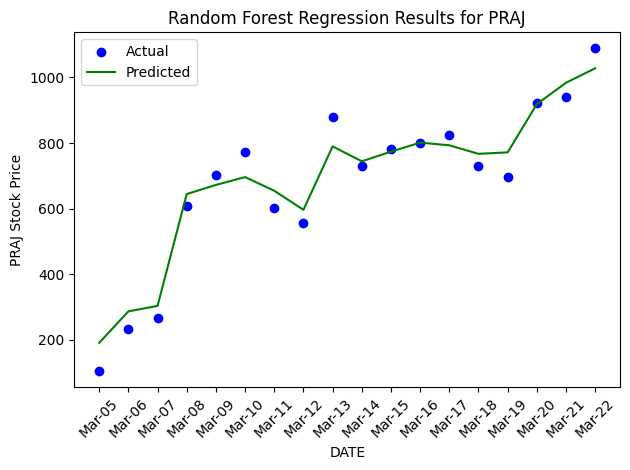

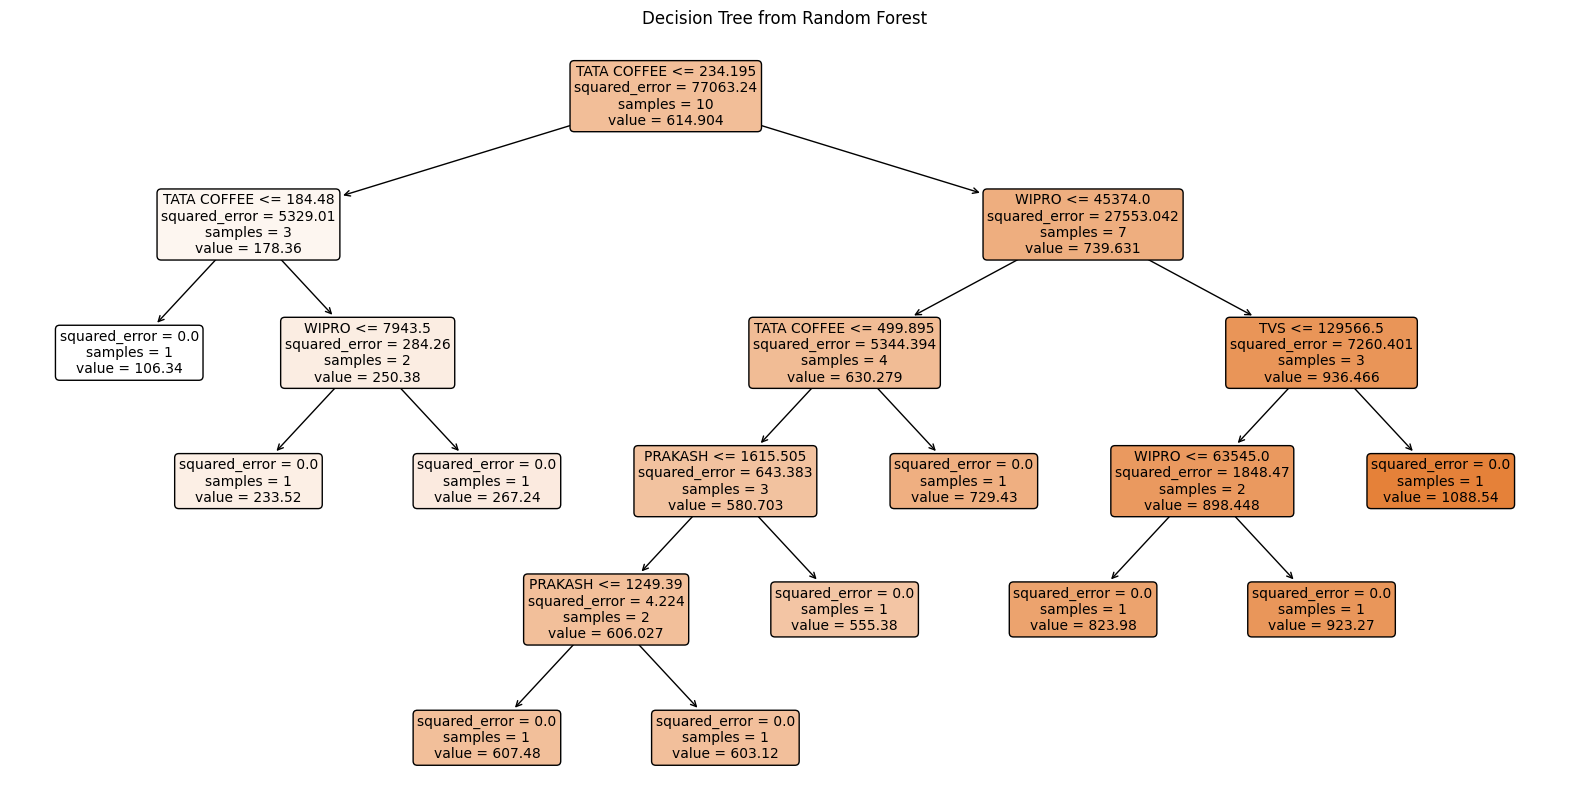

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")


X = df.drop(columns=['DATE', 'PRAJ']).values
y = df['PRAJ'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['DATE'], y, color='blue', label='Actual')
plt.plot(df['DATE'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for PRAJ")
plt.xlabel('DATE')
plt.ylabel('PRAJ Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['DATE', 'PRAJ']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.8089191774344788
Mean Squared Error: 22194.245375222235
R-squared: 0.9707149199601215


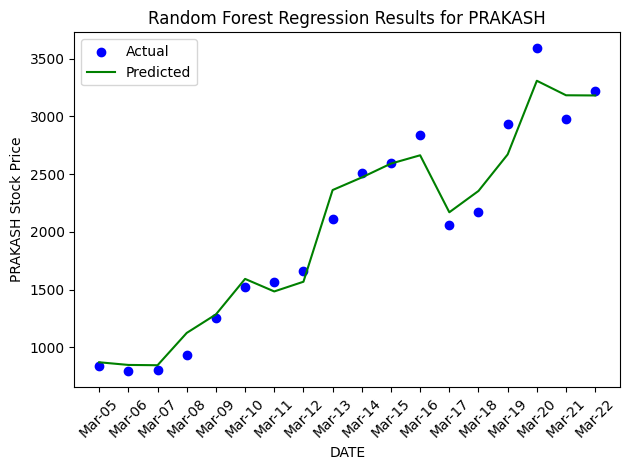

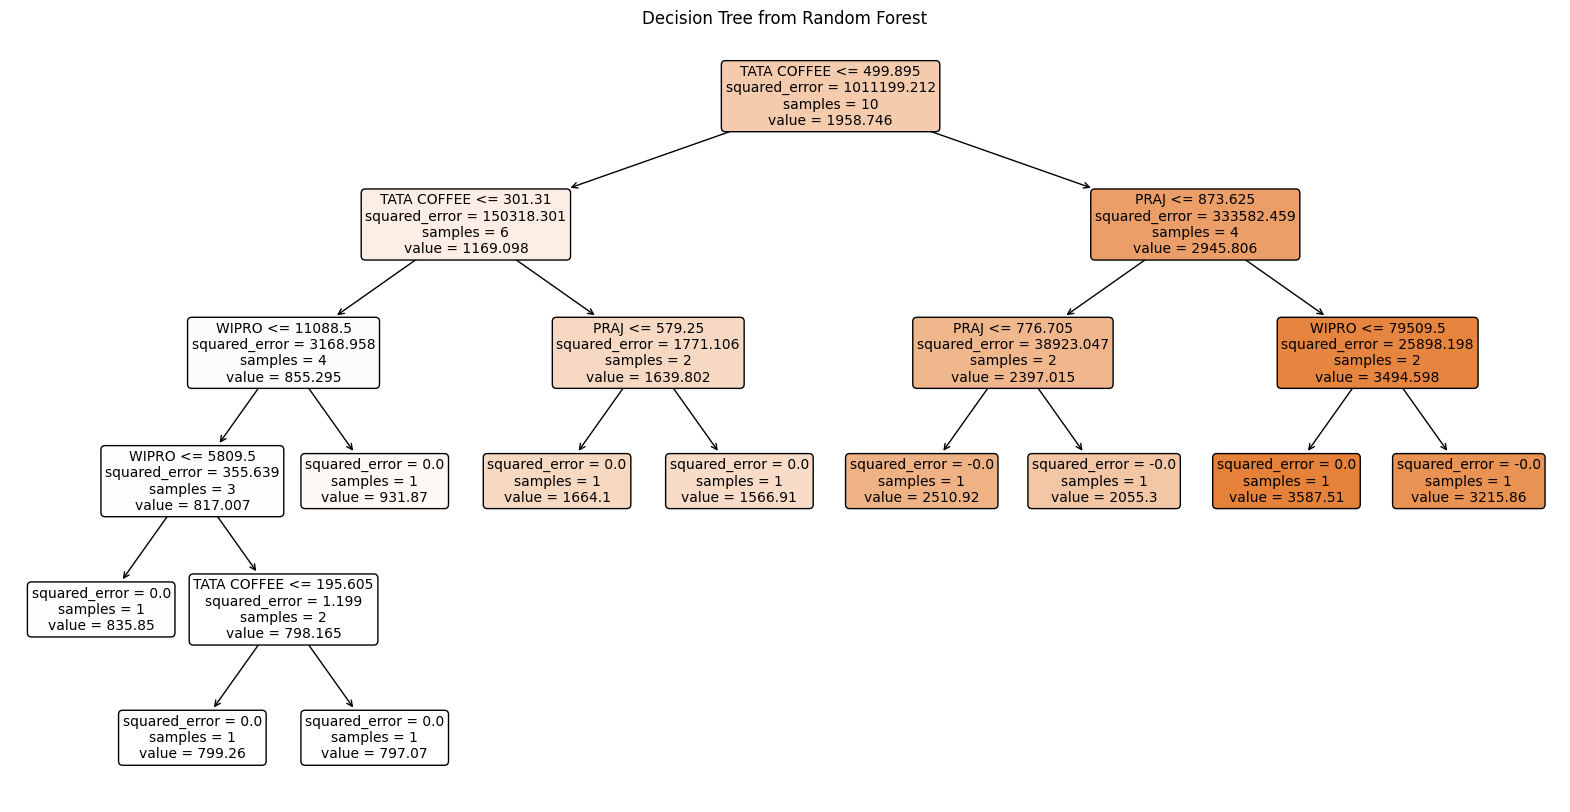

In [4]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")

X = df.drop(columns=['DATE', 'PRAKASH']).values
y = df['PRAKASH'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['DATE'], y, color='blue', label='Actual')
plt.plot(df['DATE'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for PRAKASH")
plt.xlabel('DATE')
plt.ylabel('PRAKASH Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['DATE', 'PRAKASH']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.9214970236042929
Mean Squared Error: 570.6932875555563
R-squared: 0.9875971149620042


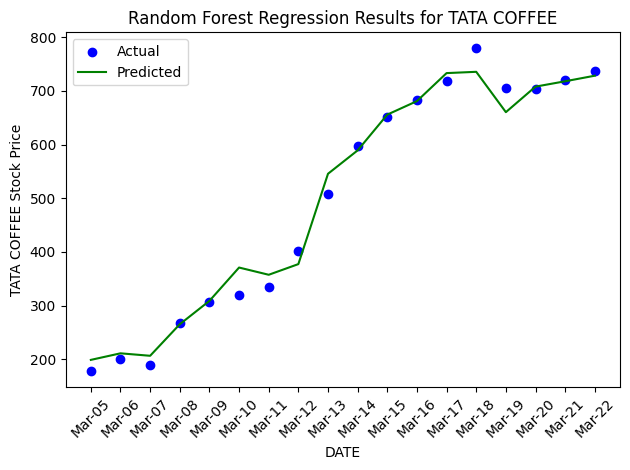

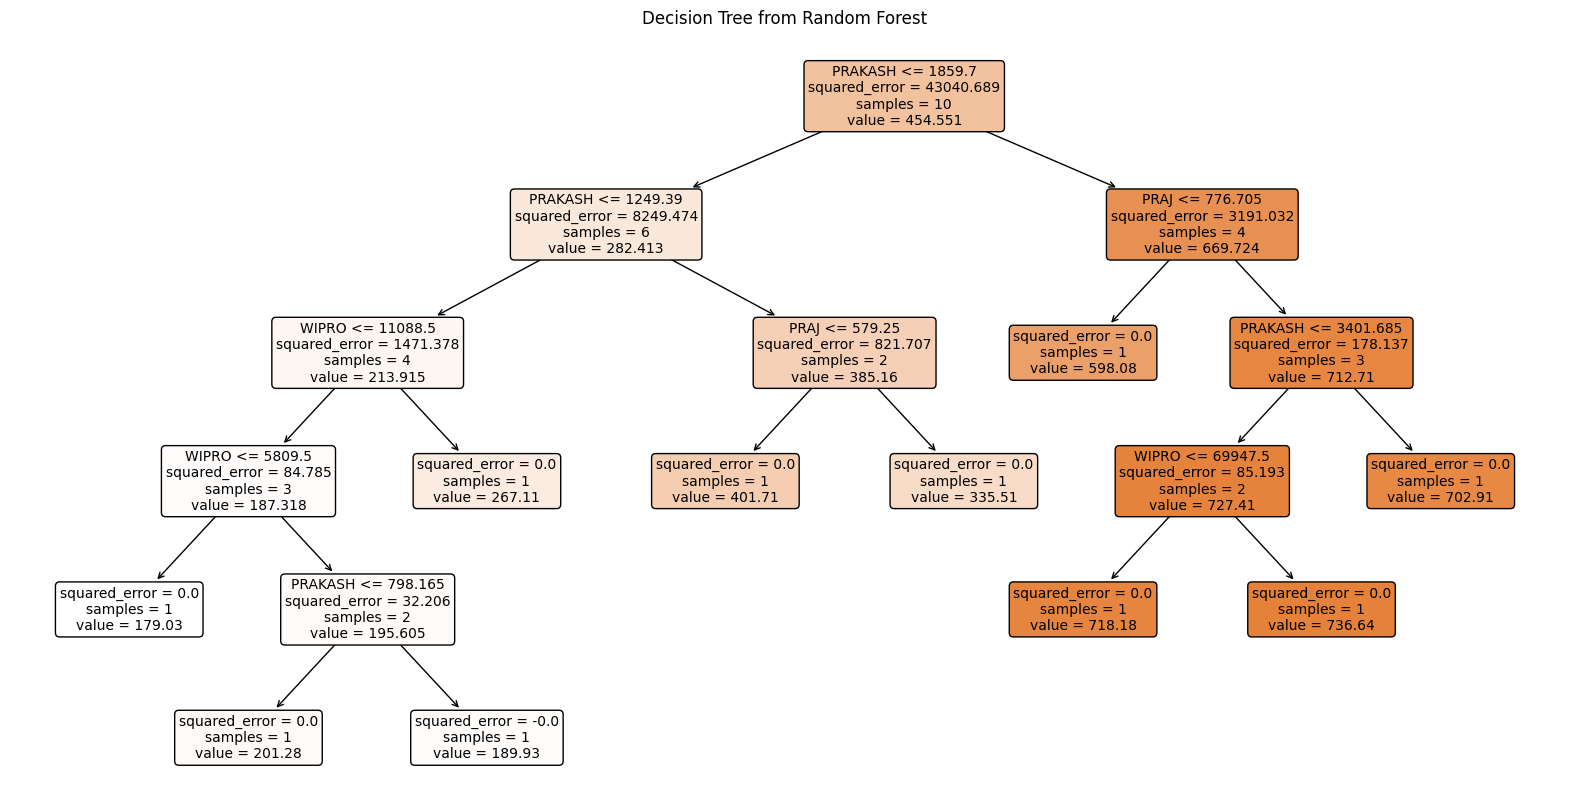

In [10]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")

X = df.drop(columns=['DATE', 'TATA COFFEE']).values
y = df['TATA COFFEE'].values


regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['DATE'], y, color='blue', label='Actual')
plt.plot(df['DATE'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for TATA COFFEE")
plt.xlabel('DATE')
plt.ylabel('TATA COFFEE Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0] 

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['DATE', 'TATA COFFEE']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.9552581591573804
Mean Squared Error: 13121659.927980382
R-squared: 0.9929917341788959


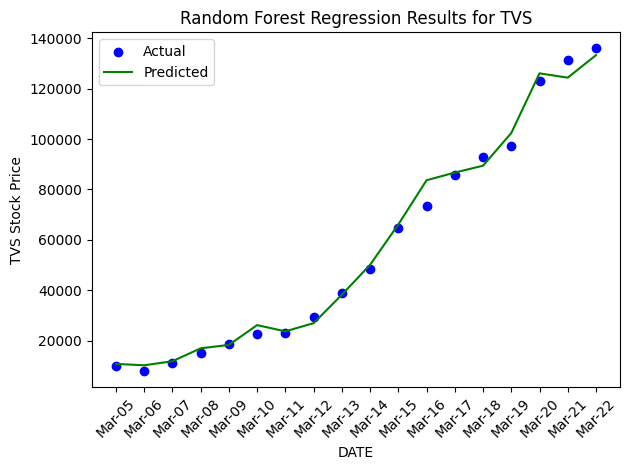

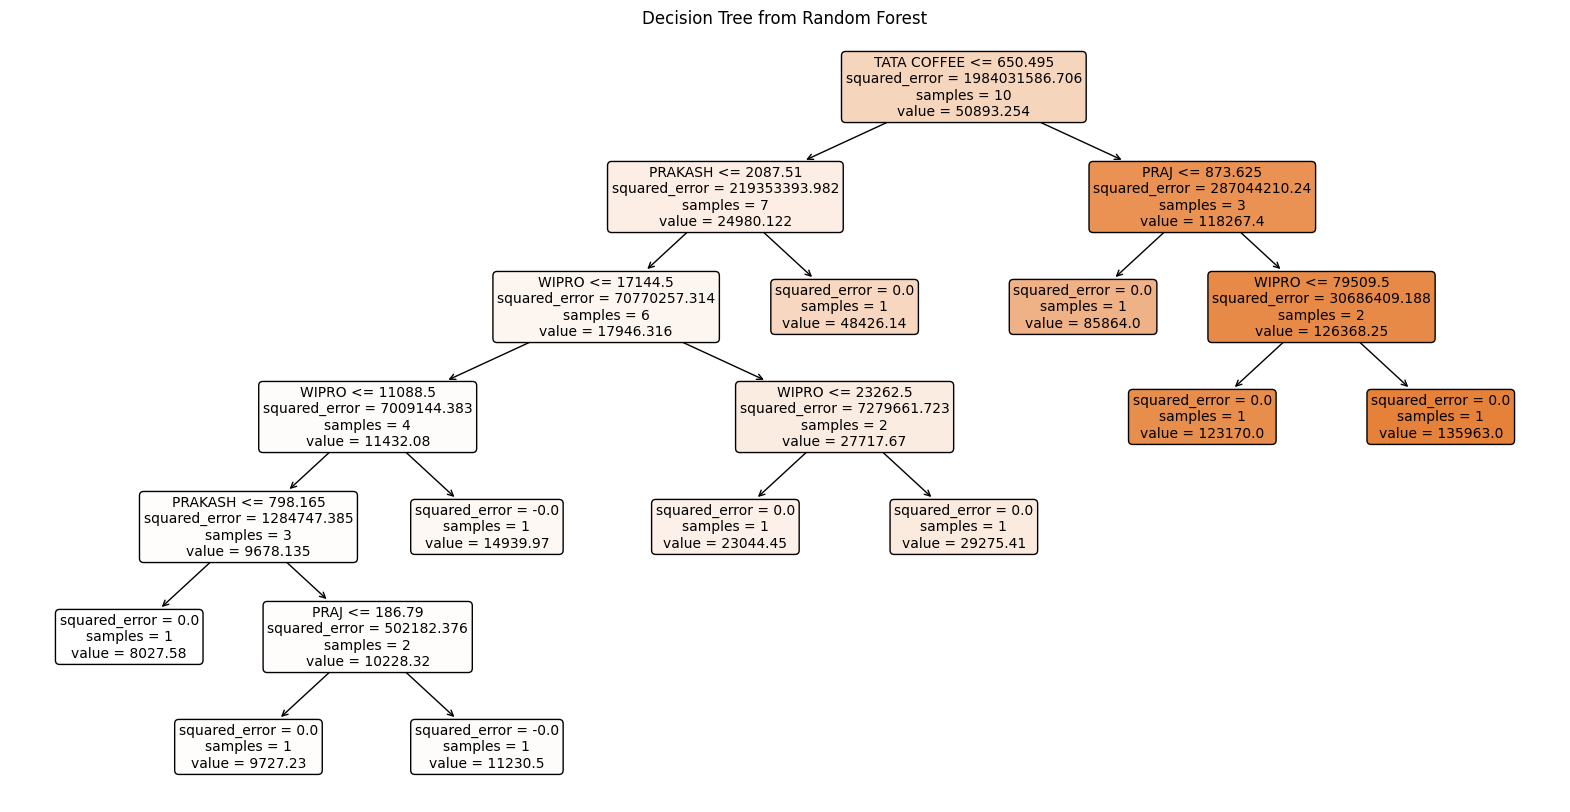

In [12]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")


X = df.drop(columns=['DATE', 'TVS']).values
y = df['TVS'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['DATE'], y, color='blue', label='Actual')
plt.plot(df['DATE'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for TVS")
plt.xlabel('DATE')
plt.ylabel('TVS Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['DATE', 'TVS']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.9270187929514143
Mean Squared Error: 8683099.56166666
R-squared: 0.9863570957547361


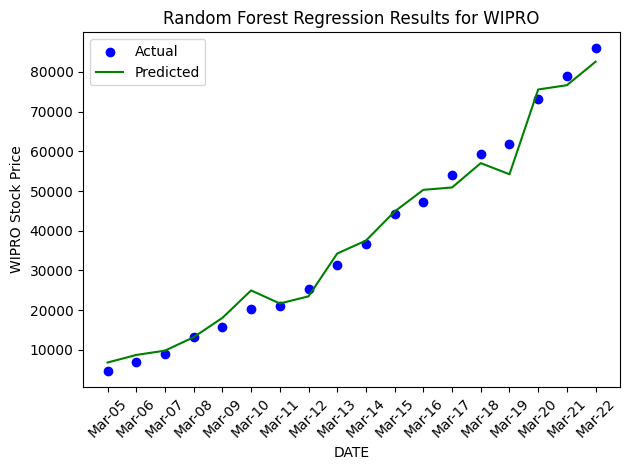

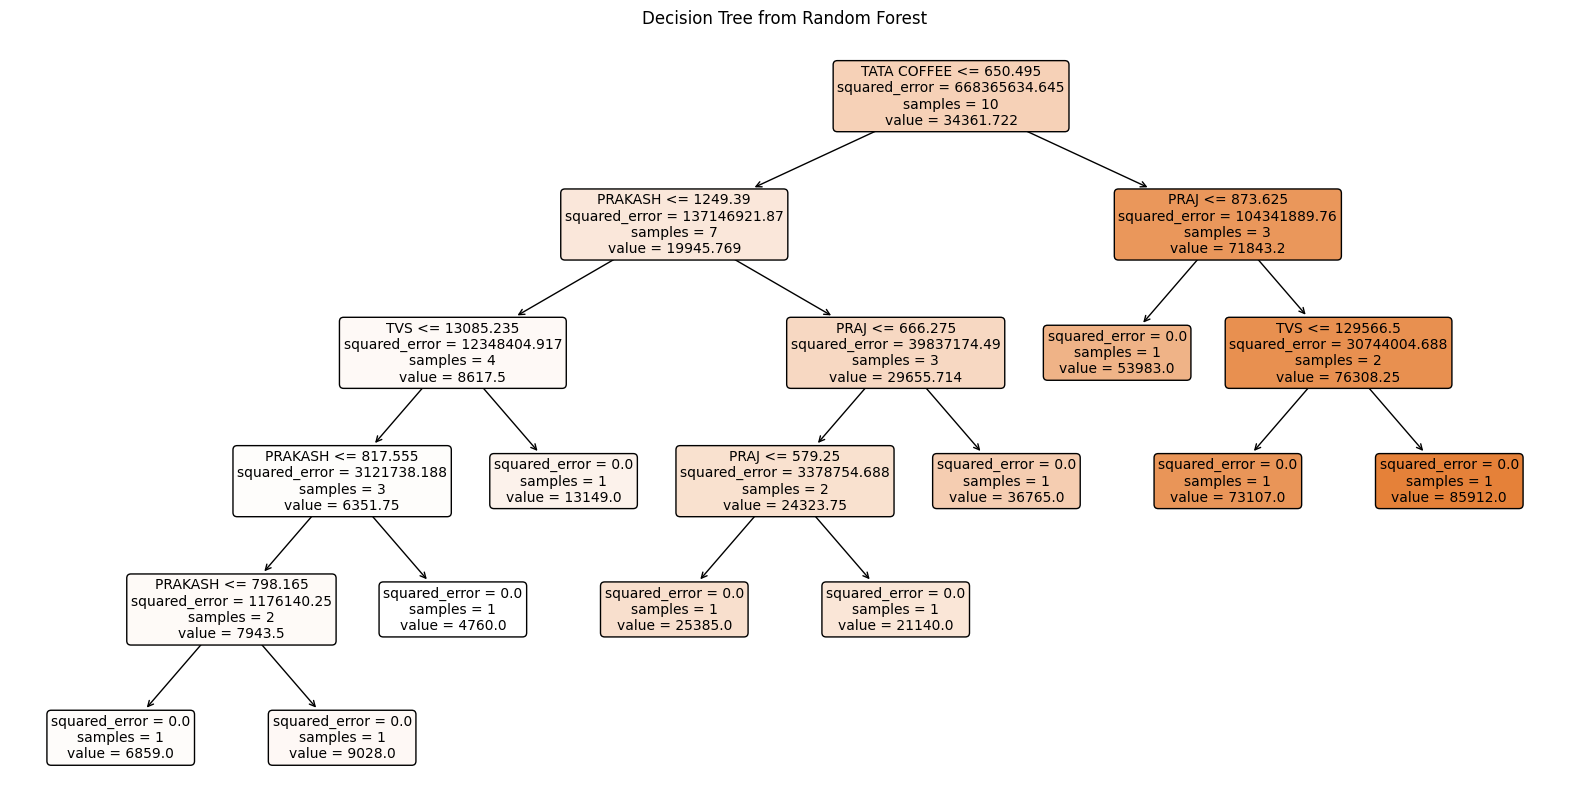

In [13]:

warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")


X = df.drop(columns=['DATE', 'WIPRO']).values
y = df['WIPRO'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['DATE'], y, color='blue', label='Actual')
plt.plot(df['DATE'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for WIPRO")
plt.xlabel('DATE')
plt.ylabel('WIPRO Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['DATE', 'WIPRO']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.871198365841391
Mean Squared Error: 1145891.3912810548
R-squared: 0.9702685243337599


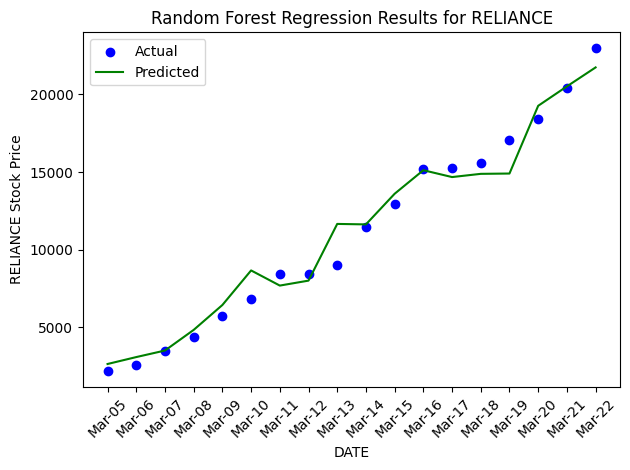

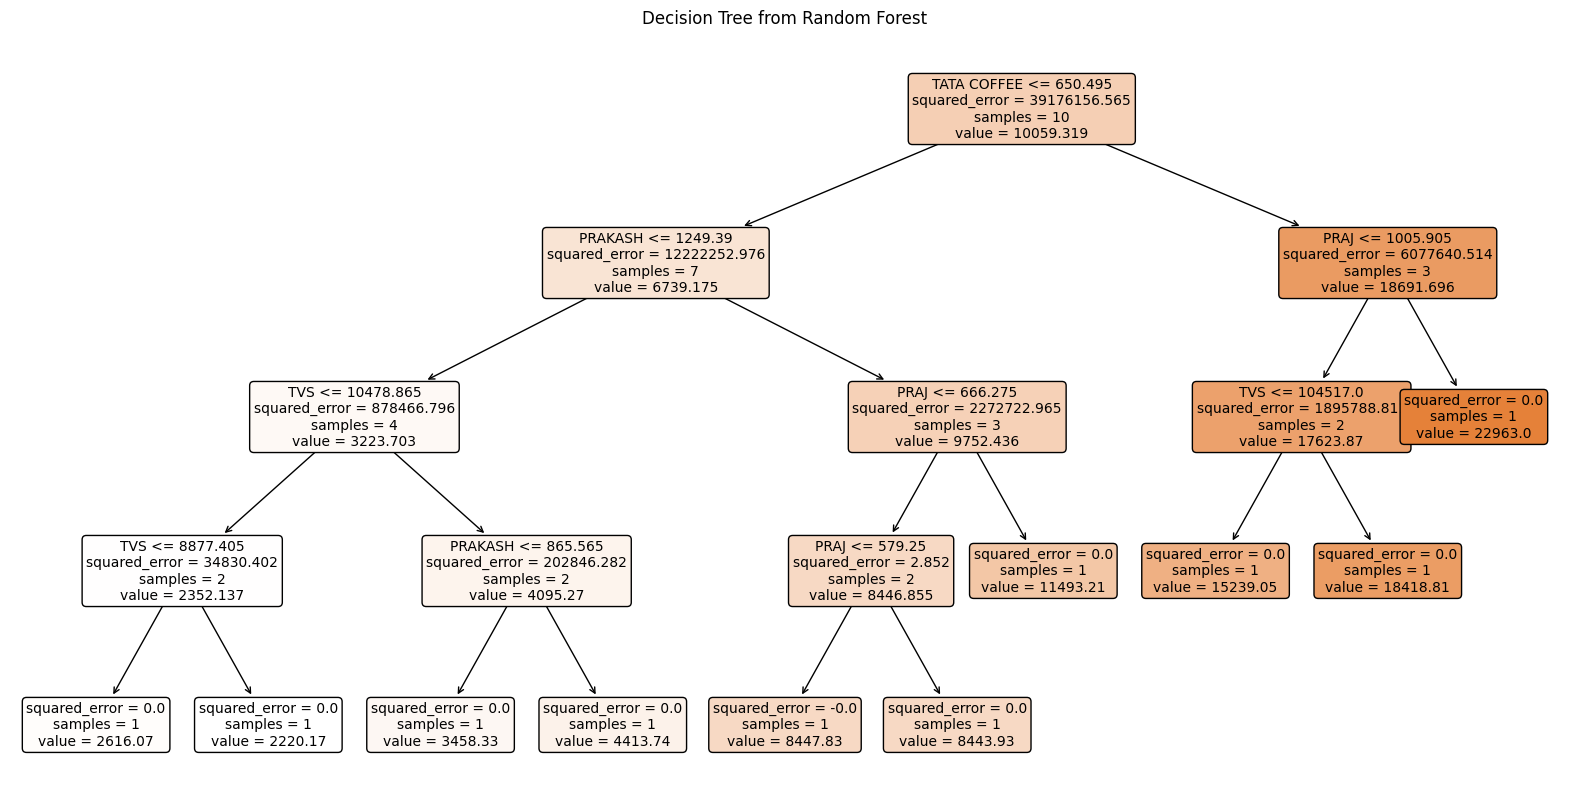

In [14]:

warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")

X = df.drop(columns=['DATE', 'RELIANCE']).values
y = df['RELIANCE'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['DATE'], y, color='blue', label='Actual')
plt.plot(df['DATE'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for RELIANCE")
plt.xlabel('DATE')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['DATE', 'RELIANCE']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.3681327777738921
Mean Squared Error: 1303.7320416666669
R-squared: 0.8742257622791554


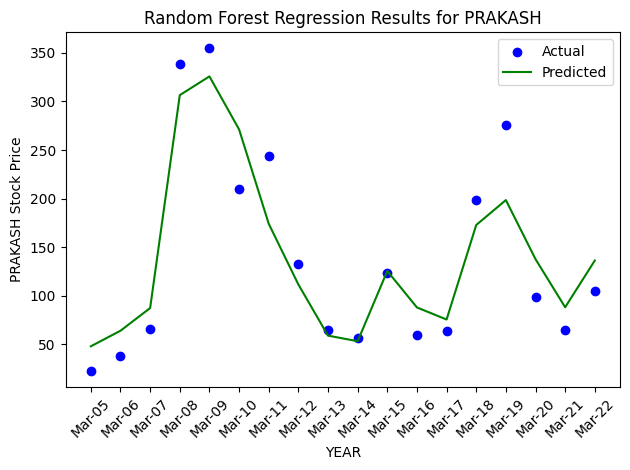

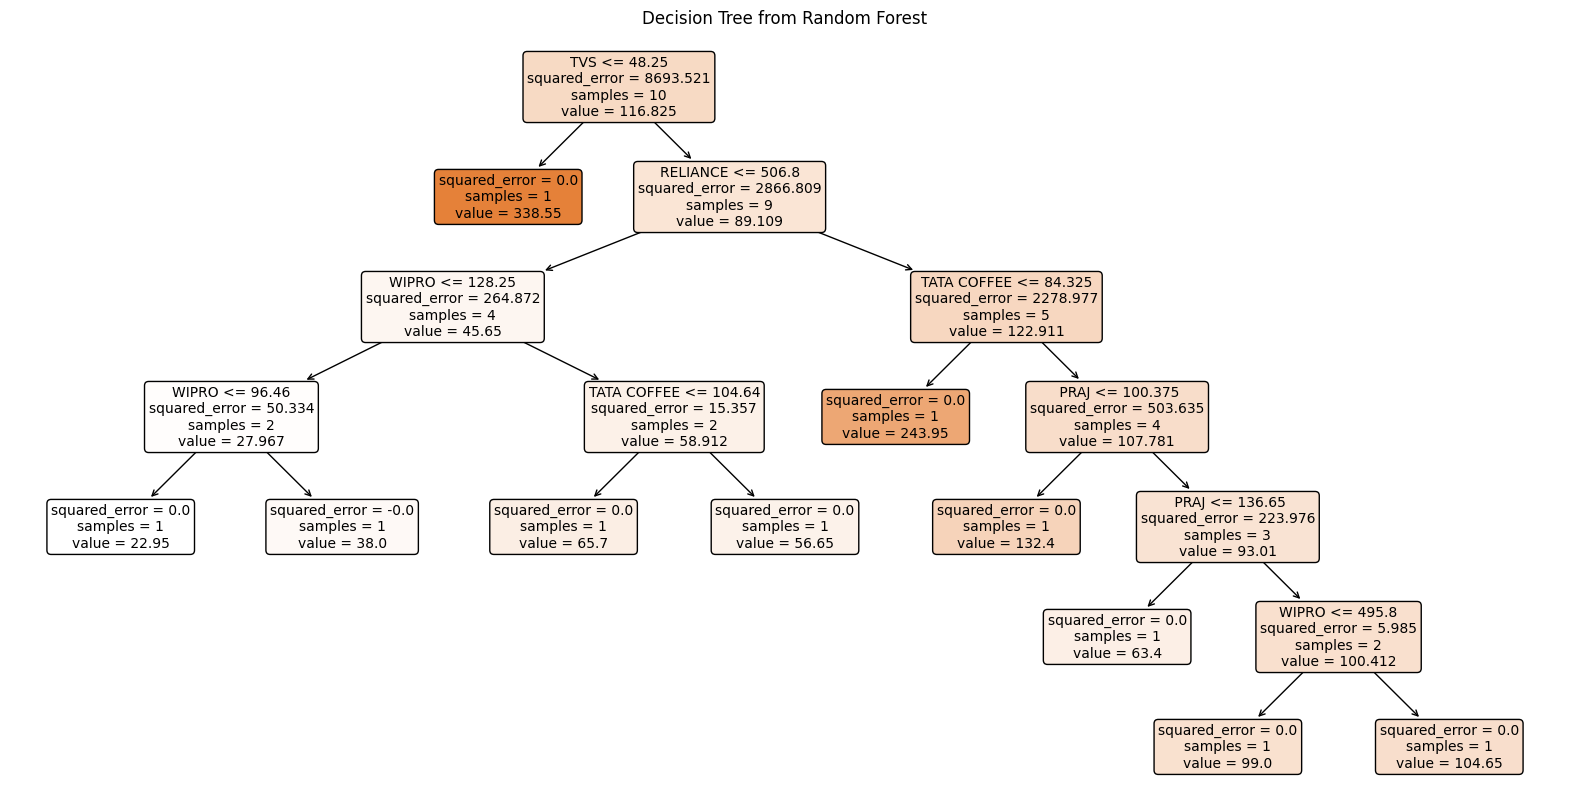

In [16]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\HIGH_YEAR.csv")


X = df.drop(columns=['YEAR', 'PRAKASH']).values
y = df['PRAKASH'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for PRAKASH")
plt.xlabel('YEAR')
plt.ylabel('PRAKASH Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'PRAKASH']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.11305938823890227
Mean Squared Error: 528.2229649444446
R-squared: 0.8354527434256369


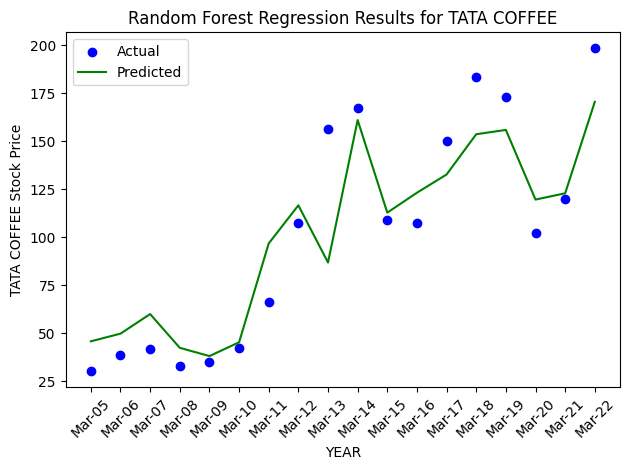

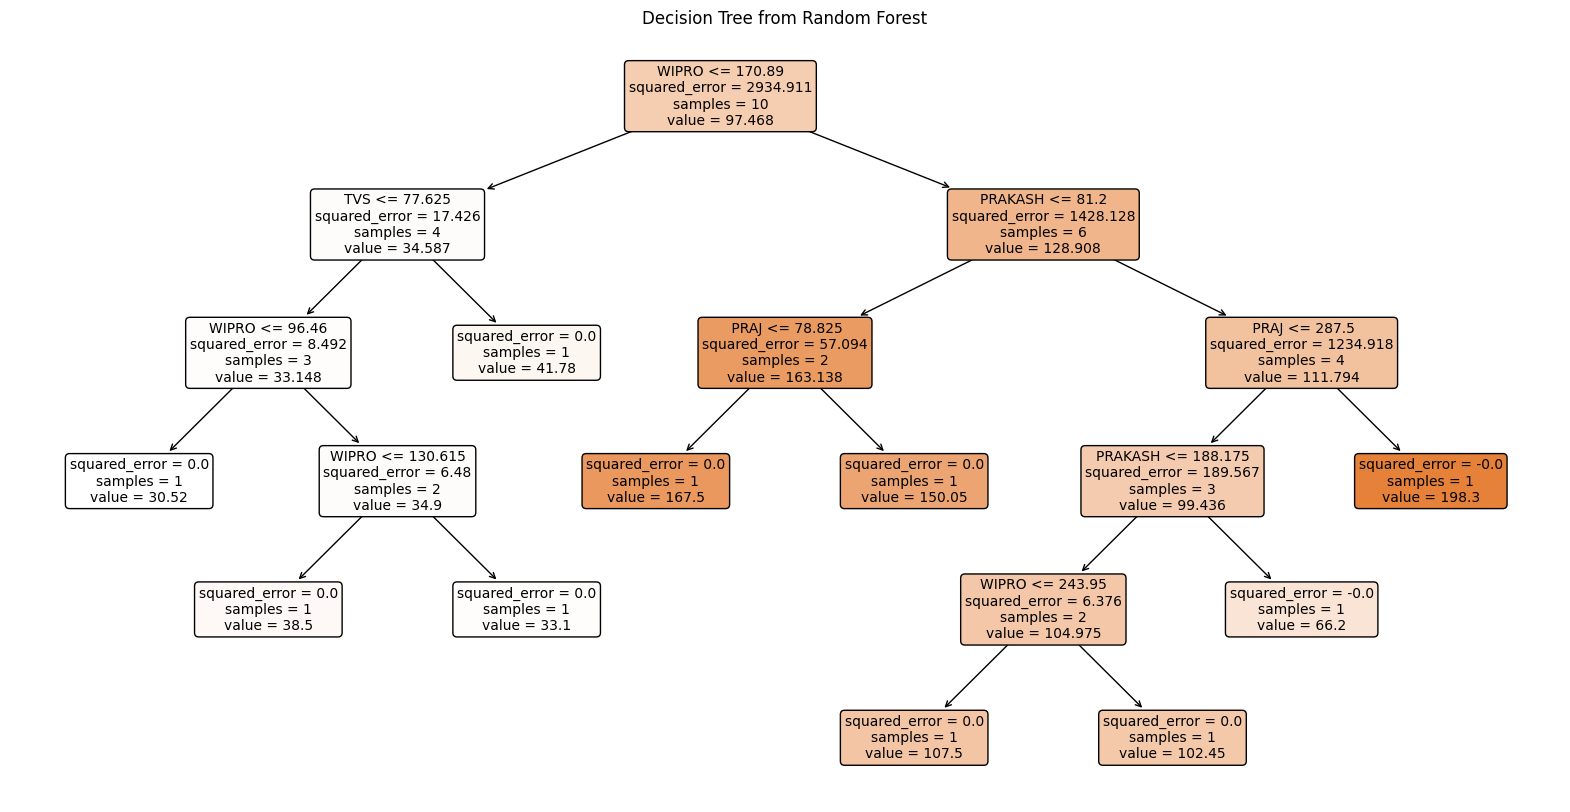

In [17]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\HIGH_YEAR.csv")


X = df.drop(columns=['YEAR', 'TATA COFFEE']).values
y = df['TATA COFFEE'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for TATA COFFEE")
plt.xlabel('YEAR')
plt.ylabel('TATA COFFEE Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'TATA COFFEE']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.7391876819574337
Mean Squared Error: 2240.9774677777755
R-squared: 0.9694275498852893


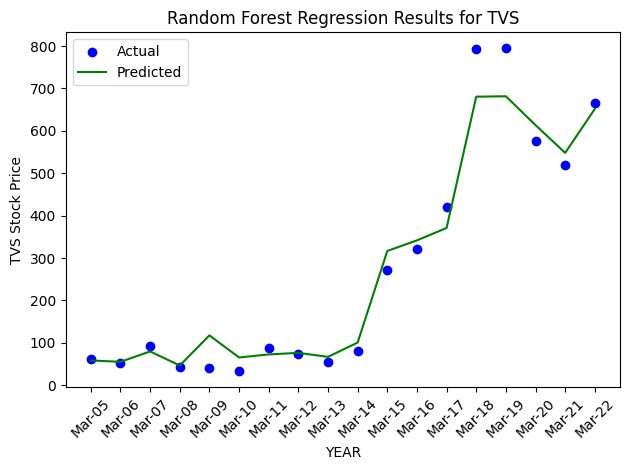

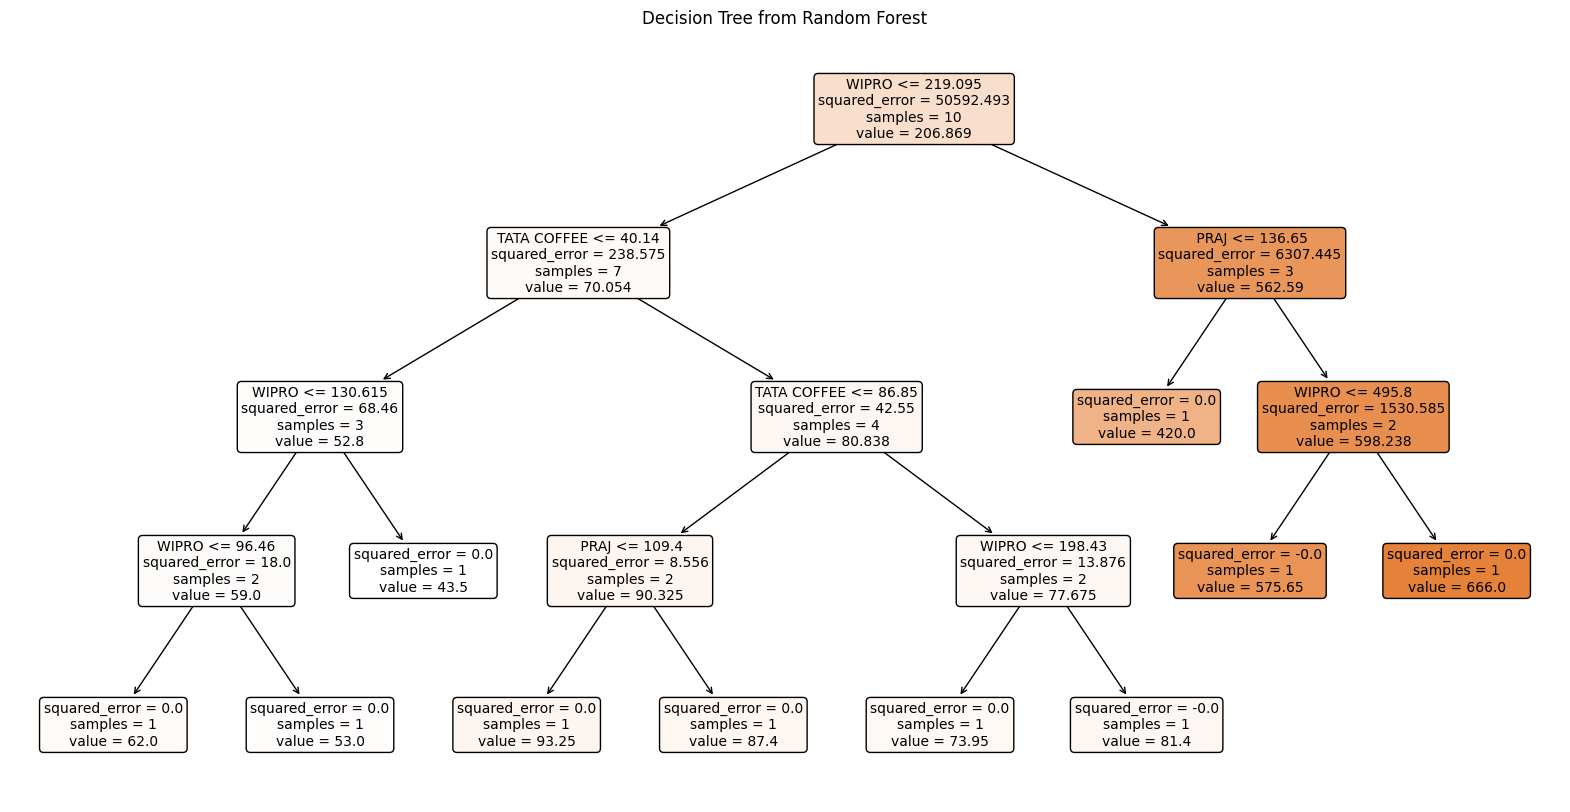

In [18]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\HIGH_YEAR.csv")


X = df.drop(columns=['YEAR', 'TVS']).values
y = df['TVS'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for TVS")
plt.xlabel('YEAR')
plt.ylabel('TVS Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'TVS']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.46238384076606165
Mean Squared Error: 1247.2002748333325
R-squared: 0.9290825748446565


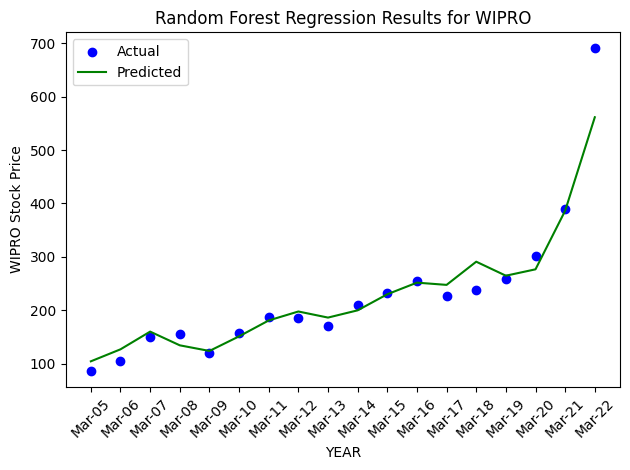

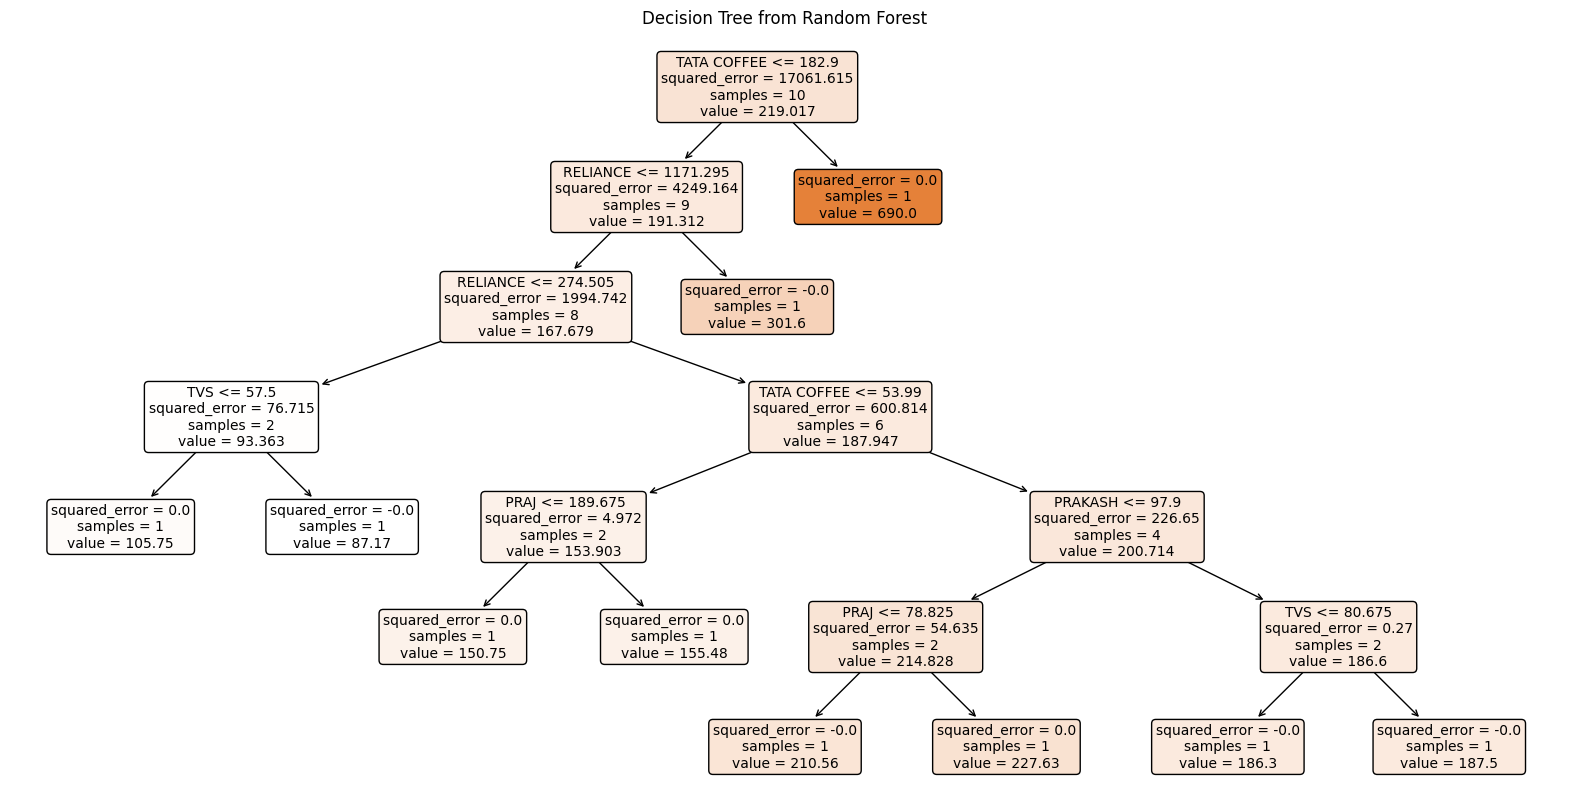

In [19]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\HIGH_YEAR.csv")


X = df.drop(columns=['YEAR', 'WIPRO']).values
y = df['WIPRO'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for WIPRO")
plt.xlabel('YEAR')
plt.ylabel('WIPRO Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'WIPRO']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.6285626503591579
Mean Squared Error: 21635.167473222227
R-squared: 0.9495478744144258


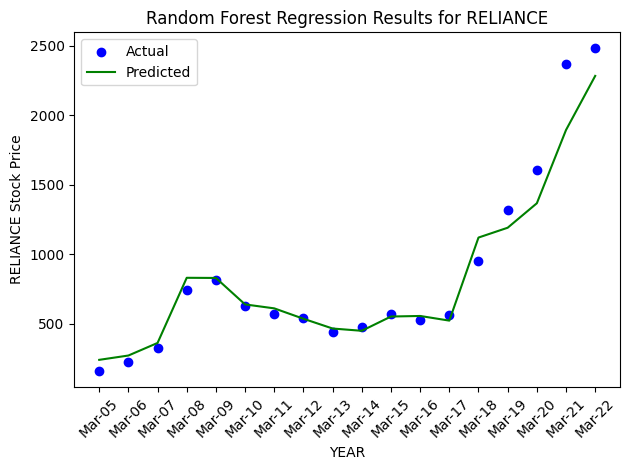

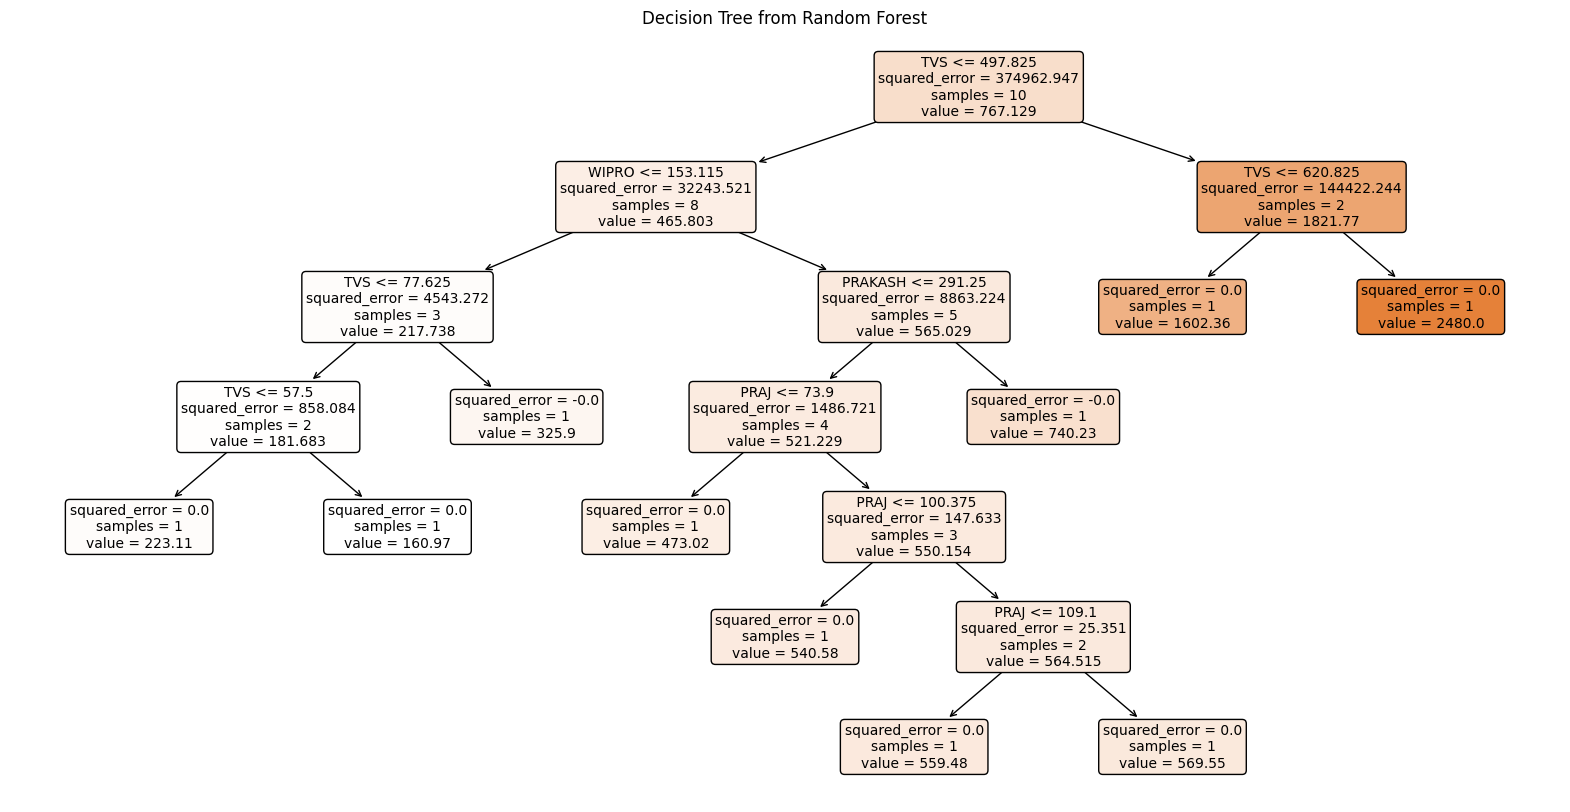

In [20]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\HIGH_YEAR.csv")


X = df.drop(columns=['YEAR', 'RELIANCE']).values
y = df['RELIANCE'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for RELIANCE")
plt.xlabel('YEAR')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'RELIANCE']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.40592733100535716
Mean Squared Error: 3935.6830995555565
R-squared: 0.8513238656343058


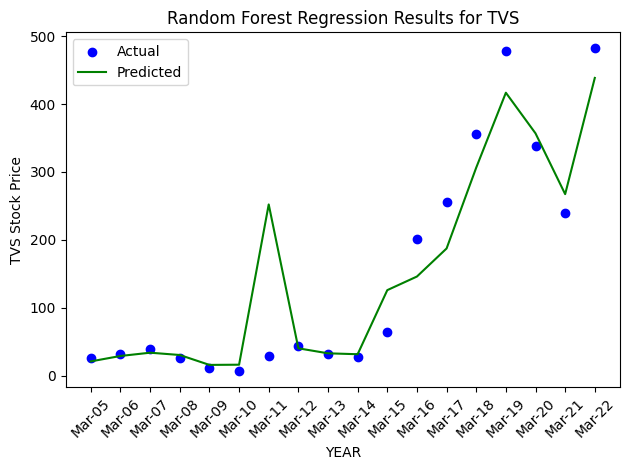

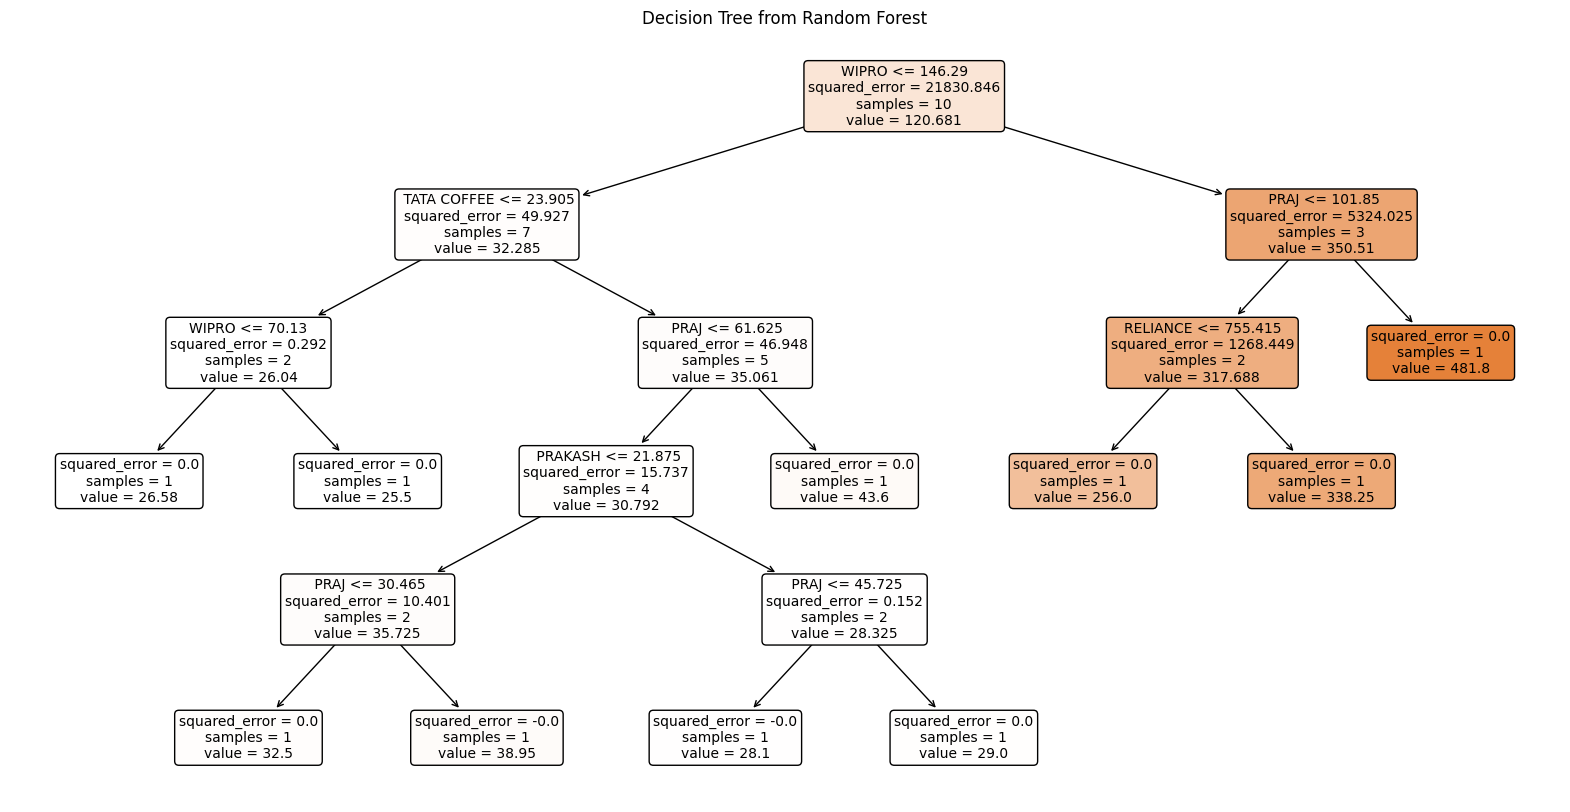

In [22]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\LOW_YEAR.csv")


X = df.drop(columns=['YEAR', 'TVS']).values
y = df['TVS'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for TVS")
plt.xlabel('YEAR')
plt.ylabel('TVS Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'TVS']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.5155825886801898
Mean Squared Error: 583.2021497222217
R-squared: 0.9199073250783273


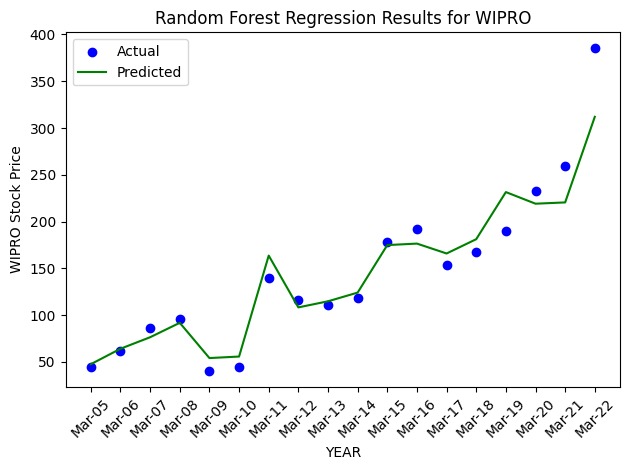

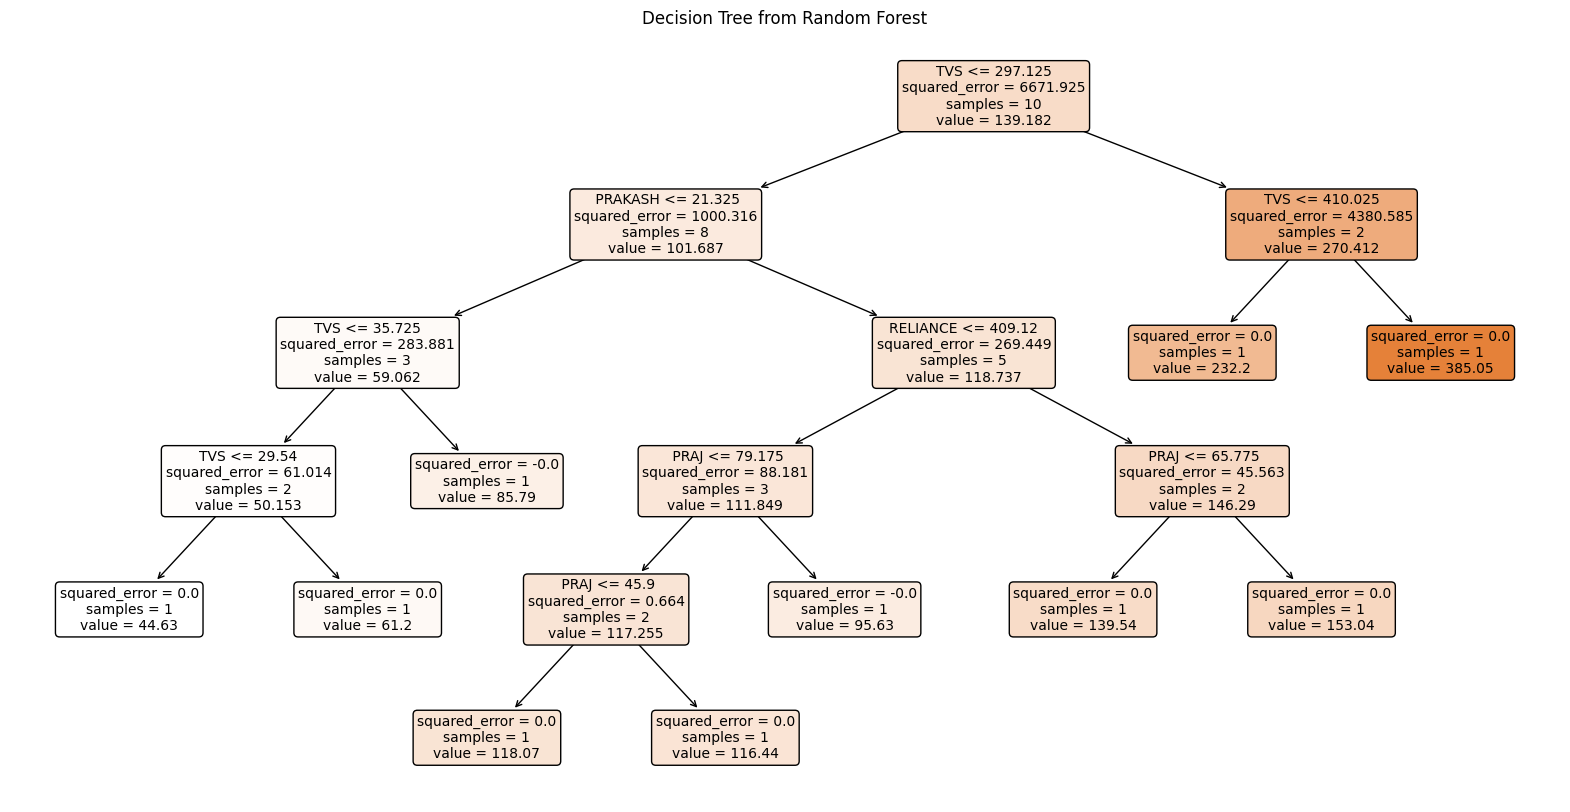

In [23]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\LOW_YEAR.csv")


X = df.drop(columns=['YEAR', 'WIPRO']).values
y = df['WIPRO'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for WIPRO")
plt.xlabel('YEAR')
plt.ylabel('WIPRO Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'WIPRO']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





Out-of-Bag Score: 0.6553440055555468
Mean Squared Error: 12351.765381222216
R-squared: 0.9272805769612673


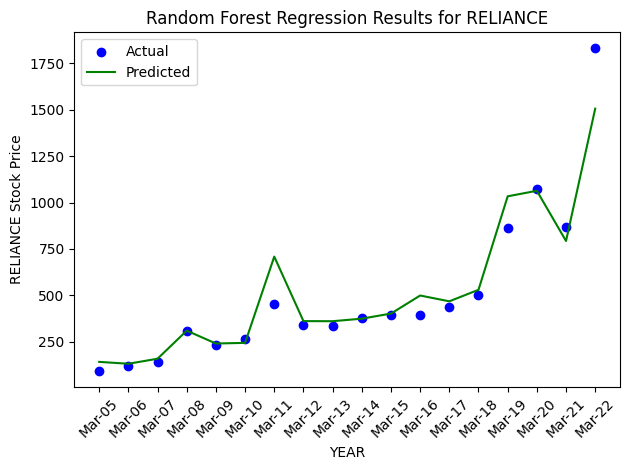

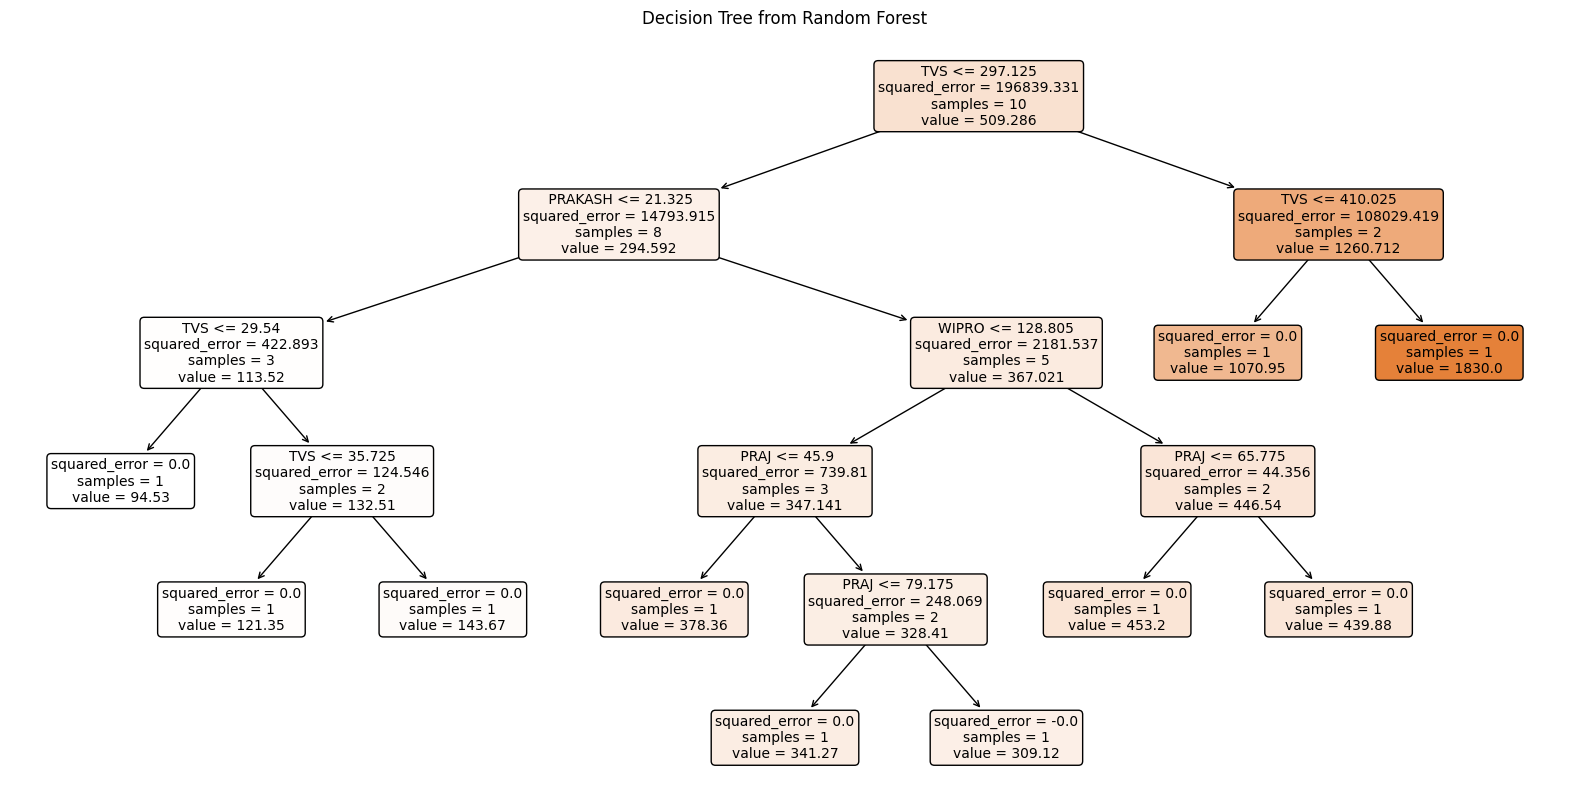

In [24]:
warnings.filterwarnings('ignore')
df = pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\LOW_YEAR.csv")


X = df.drop(columns=['YEAR', 'RELIANCE']).values
y = df['RELIANCE'].values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

plt.scatter(df['YEAR'], y, color='blue', label='Actual')
plt.plot(df['YEAR'], predictions, color='green', label='Predicted')
plt.title("Random Forest Regression Results for RELIANCE")
plt.xlabel('YEAR')
plt.ylabel('RELIANCE Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.tree import plot_tree

tree_to_plot = regressor.estimators_[0]  

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.drop(columns=['YEAR', 'RELIANCE']).columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()





In [25]:
import pandas as pd
import numpy as np
df1=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_MIN.csv")
df2=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_MAX.csv")
df3=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_NET INCOME GROWTH.csv")
df4=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_HIGH.csv")
df5=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PP_PROJECT_LOW.csv")
df6=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PRAJ PIE.csv",index_col='CATEGORY')
df7=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\PRAKASH PIE.csv",index_col='CATEGORY')
df8=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_1\\TATA PIE.csv",index_col='CATEGORY')
print(df1)
print(df2)
print(df3)
print(df4)
print(df5)
print(df6)
print(df7)
print(df8)


         DATE   MIN PRAJ  MIN PRAKASH  MIN TATA COFFEE
0   03-May-23     233.92        80.30           127.75
1   04-May-23     240.72        85.14           140.12
2   05-May-23     244.20        87.21           140.54
3   06-May-23     245.67        87.22           143.79
4   07-May-23     264.27        86.33           143.79
5   10-May-23     271.61        92.75           153.00
6   11-May-23     302.45        95.12           161.36
7   12-May-23     303.33        91.28           159.40
8   14-May-23     281.72        85.25           157.50
9   17-May-23     307.15        87.92           158.50
10  18-May-23     334.66        91.12           159.80
11  19-May-23     364.02        89.30           162.72
12  20-May-23     370.85        86.39           179.17
13  21-May-23     349.34        87.61           176.13
         DATE   MAX  PRAJ  MAX PRAKASH  MAX TATA COFFEE
0   03-May-23      257.91        85.63           139.43
1   04-May-23      253.50        90.87           147.20
2   05-

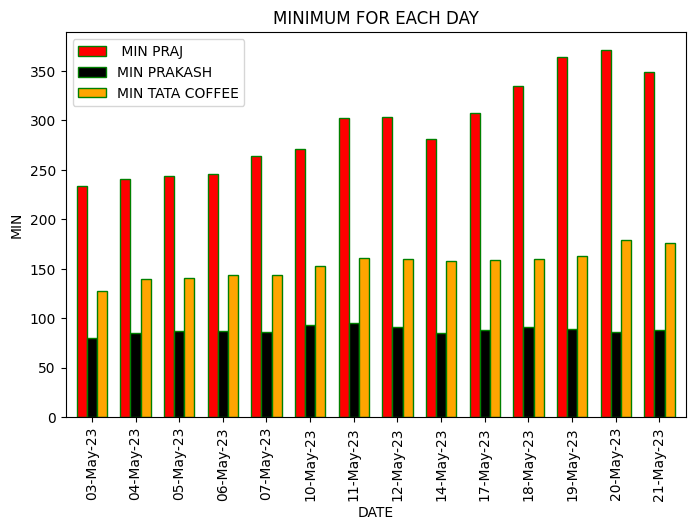

In this plot, we show the minimum value of each company's share per day from 3-May-2023 to 21-May-2023. Praj industries shows the highest value and Prakash industries shows the lowest value consistently during this period.


In [26]:
import matplotlib.pyplot as plt
df1.plot(kind='bar',xlabel='DATE',ylabel='MIN',color=['red','black','orange'],width=0.7,title='MINIMUM FOR EACH DAY',edgecolor='green',figsize=(8,5))
ticks=df1.index.tolist()
plt.xticks(ticks,df1.DATE,rotation=90)
plt.show()
print("In this plot, we show the minimum value of each company's share per day from 3-May-2023 to 21-May-2023. Praj industries shows the highest value and Prakash industries shows the lowest value consistently during this period.")


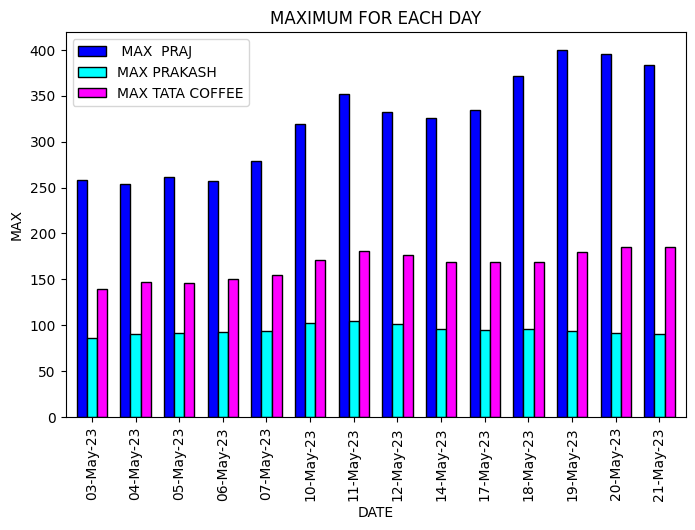

In this plot, we show the maximum value of each company's share per day from 3-May-2023 to 21-May-2023. Praj industries shows the highest value and Prakash industries shows the lowest value consistently during this period.


In [46]:

df2.plot(kind='bar',xlabel='DATE',ylabel='MAX',edgecolor='black',width=0.7,color=['blue','cyan','magenta'],title='MAXIMUM FOR EACH DAY',figsize=(8,5))
ticks=df2.index.tolist()
plt.xticks(ticks,df2.DATE,rotation=90)
plt.show()
print("In this plot, we show the maximum value of each company's share per day from 3-May-2023 to 21-May-2023. Praj industries shows the highest value and Prakash industries shows the lowest value consistently during this period.")

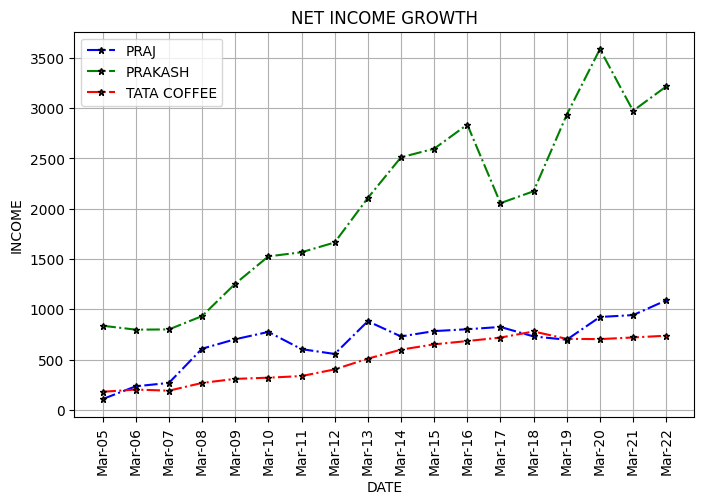

In this plot, we show the net income growth of each company from March 2005 to March 2022. Prakash industries shows steeper growth than Praj and Tata Coffee during this period.


In [47]:

df3.plot(kind='line',title='NET INCOME GROWTH',xlabel='DATE',ylabel='INCOME',color=['blue','green','red'], grid=True,marker='*',markeredgecolor='k',markersize=5,linestyle='dashdot',figsize=(8,5))
ticks=df3.index.tolist()
plt.xticks(ticks,df3.DATE,rotation=90)
plt.show()
print('In this plot, we show the net income growth of each company from March 2005 to March 2022. Prakash industries shows steeper growth than Praj and Tata Coffee during this period.')


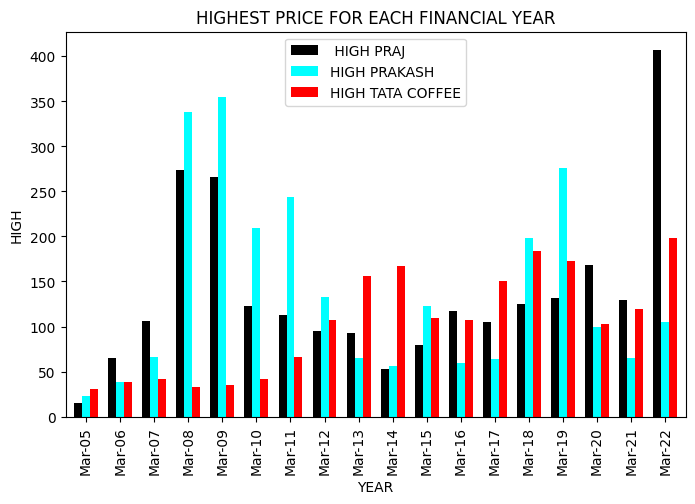

In this plot, we show the highest value of each company's share from March 2005 to March 2023. The plot does not reveal a flat trend but rather shows rise and fall in the values of all three companies during this period.


In [29]:
import matplotlib.pyplot as plt
df4.plot(kind='bar', xlabel='YEAR', ylabel='HIGH',color=['black','cyan','red'],width=0.7,title='HIGHEST PRICE FOR EACH FINANCIAL YEAR',figsize=(8,5))
ticks=df4.index.tolist()
plt.xticks(ticks,df4.YEAR,rotation=90)
plt.show()
print("In this plot, we show the highest value of each company's share from March 2005 to March 2023. The plot does not reveal a flat trend but rather shows rise and fall in the values of all three companies during this period.")



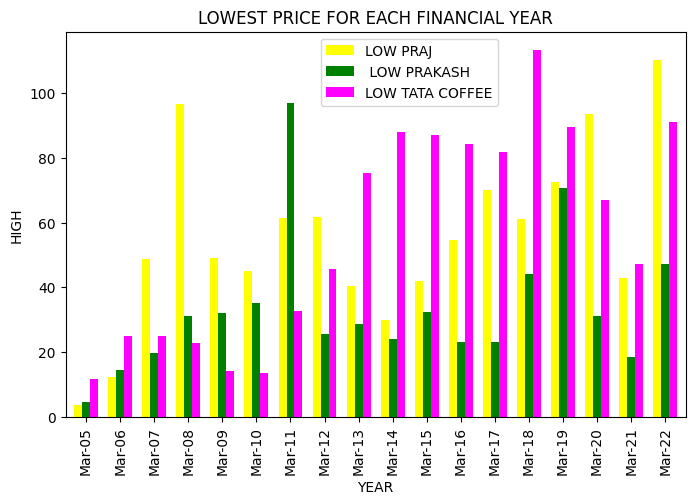

In this plot, we show the lowest value of each company's share from March 2005 to March 2022. The plot does not reveal a flat trend but rather shows rise and fall in the values of all three companies during this period.


In [30]:
import matplotlib.pyplot as plt
df5.plot(kind='bar', xlabel='YEAR', ylabel='HIGH',color=['yellow','green','magenta'],width=0.7,title='LOWEST PRICE FOR EACH FINANCIAL YEAR',figsize=(8,5))
ticks=df5.index.tolist()
plt.xticks(ticks,df5.YEAR,rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(0.4,0.5,0.5,0.5))
plt.show()
print("In this plot, we show the lowest value of each company's share from March 2005 to March 2022. The plot does not reveal a flat trend but rather shows rise and fall in the values of all three companies during this period.")


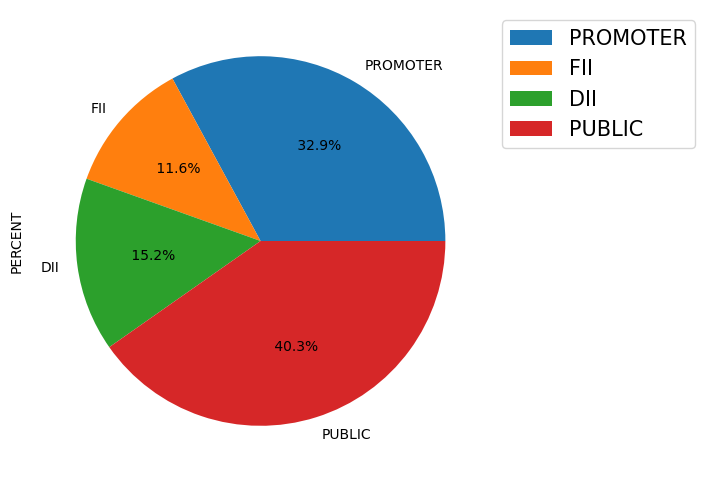

In this plot, we show the percentage of shares of Praj Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the second quarter of the financial year i.e. March 2023. The maximum no. of shares are bought by the Public and the minimum no. by FII.


In [31]:
import matplotlib.pyplot as plt
df6.plot(kind='pie',y='PERCENT',autopct="%5.1f%%",figsize=(6,6))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5,0.5,0.5),fontsize=15)
plt.show()
print('In this plot, we show the percentage of shares of Praj Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the second quarter of the financial year i.e. March 2023. The maximum no. of shares are bought by the Public and the minimum no. by FII.')


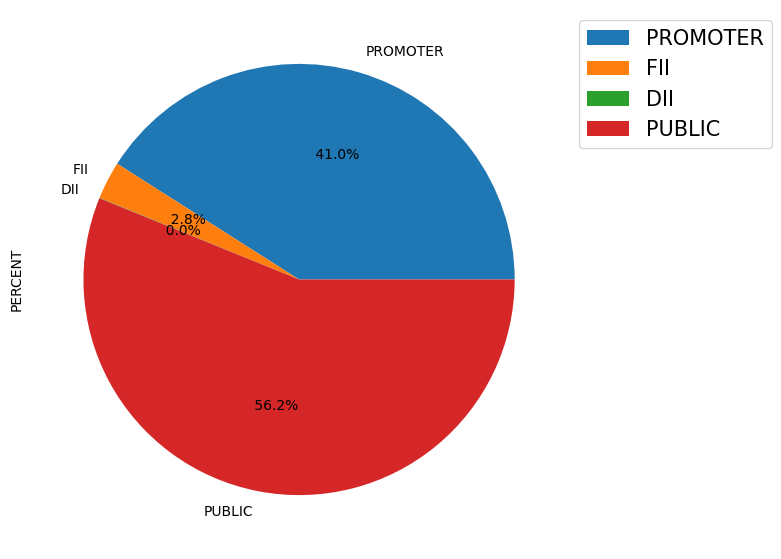

In this plot, we show the percentage of shares of Prakash Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the second quarter of the financial year i.e. March 2023. The maximum no. of shares are bought by the Public and the minimum no. by DII.


In [32]:
import matplotlib.pyplot as plt
df7.plot(kind='pie',y='PERCENT',autopct="%5.1f%%",figsize=(7,7))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5,0.5,0.5),fontsize=15)
plt.show()
print('In this plot, we show the percentage of shares of Prakash Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the second quarter of the financial year i.e. March 2023. The maximum no. of shares are bought by the Public and the minimum no. by DII.')


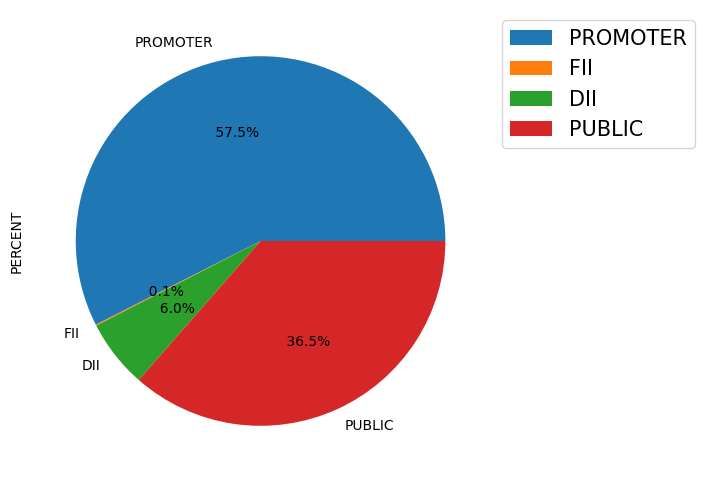

In this plot, we show the percentage of shares of Tata Coffee bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the second quarter of the financial year i.e. March 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by FII.


In [33]:
import matplotlib.pyplot as plt
df8.plot(kind='pie',y='PERCENT',autopct="%5.1f%%",figsize=(6,6))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5,0.5,0.5),fontsize=15)
plt.show()
print('In this plot, we show the percentage of shares of Tata Coffee bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the second quarter of the financial year i.e. March 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by FII.')



In [34]:
import pandas as pd
import numpy as np
dfa=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\MAX.csv")
dfb=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\MIN.csv")
dfc=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\netgrowth.csv")
dfd=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\Reliance pie.csv",index_col='CATEGORY')
dfe=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\WIPRO pie.csv",index_col='CATEGORY')
dff=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\TVS pie.csv",index_col='CATEGORY')
dfg=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\High.csv")
dfh=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_2\\Low.csv")
print(dfa)
print(dfb)
print(dfc)
print(dfd)
print(dfe)
print(dff)
print(dfg)
print(dfh)


         DATE   WIPRO  RELIANCE      TVS
0   03-May-23  495.95     539.85  637.00
1   04-May-23  487.50     529.48  623.35
2   05-May-23  495.85     524.00  617.85
3   06-May-23  514.85     535.00  630.10
4   07-May-23  516.50     533.85  630.90
5   10-May-23  528.35     555.00  624.00
6   11-May-23  523.40     532.79  629.65
7   12-May-23  522.15     525.00  627.45
8   14-May-23  510.85     539.00  619.85
9   17-May-23  503.70     532.90  630.90
10  18-May-23  514.75     543.49  645.00
11  19-May-23  517.75     545.00  650.00
12  20-May-23  517.15     545.00  644.00
13  21-May-23  515.85     543.19  635.45
         DATE   WIPRO  RELIANCE     TVS
0   03-May-23  483.15    524.19  614.00
1   04-May-23  477.80    523.26  606.90
2   05-May-23  484.65    516.10  602.40
3   06-May-23  487.45    524.08  604.80
4   07-May-23  507.40    516.75  613.70
5   10-May-23  513.25    517.10  610.35
6   11-May-23  514.00    523.10  606.40
7   12-May-23  496.65    524.86  611.20
8   14-May-23  492.75    

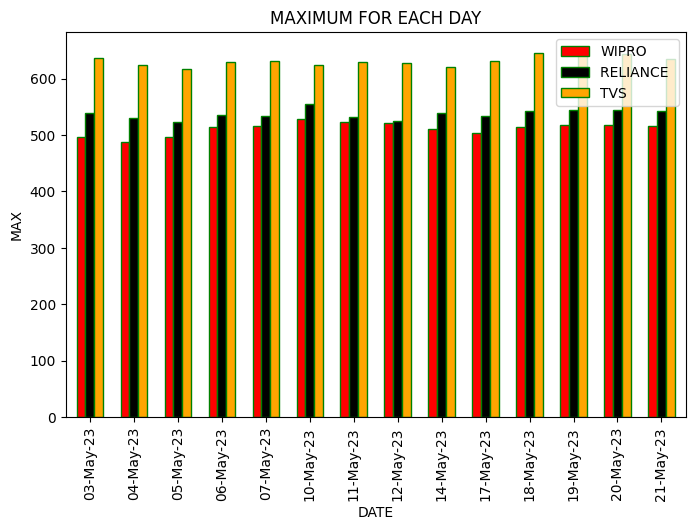

In this graph, we show the maximum value of each company's share per day from 3-May-2023 to 21-May-2023. TVS industries shows the highest value and WIPRO industries shows the lowest value consistently during this period.


In [35]:
import matplotlib.pyplot as plt
dfa.plot(kind='bar',xlabel='DATE',ylabel='MAX',color=['red','black','orange'],width=0.6,title='MAXIMUM FOR EACH DAY',edgecolor='green',figsize=(8,5))
ticks=dfa.index.tolist()
plt.xticks(ticks,dfa.DATE,rotation=90)
plt.show()
print("In this graph, we show the maximum value of each company's share per day from 3-May-2023 to 21-May-2023. TVS industries shows the highest value and WIPRO industries shows the lowest value consistently during this period.")


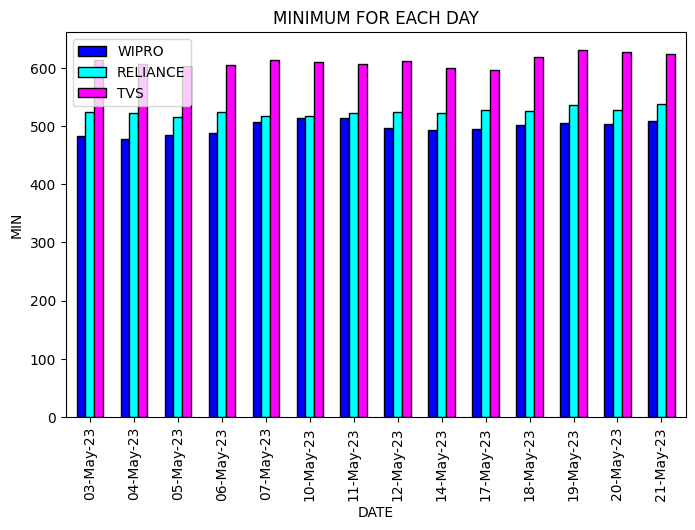

In this graph, we show the minimum value of each company's share per day from 3-May-2023 to 21-May-2023. TVS industries shows the highest value and WIPRO industries shows the lowest value consistently during this period.


In [36]:
import matplotlib.pyplot as pl
dfb.plot(kind='bar',xlabel='DATE',ylabel='MIN',edgecolor='black',width=0.6,color=['blue','cyan','magenta'],title='MINIMUM FOR EACH DAY',figsize=(8,5))
ticks=dfb.index.tolist()
plt.xticks(ticks,dfb.DATE,rotation=90)
plt.show()
print("In this graph, we show the minimum value of each company's share per day from 3-May-2023 to 21-May-2023. TVS industries shows the highest value and WIPRO industries shows the lowest value consistently during this period.")



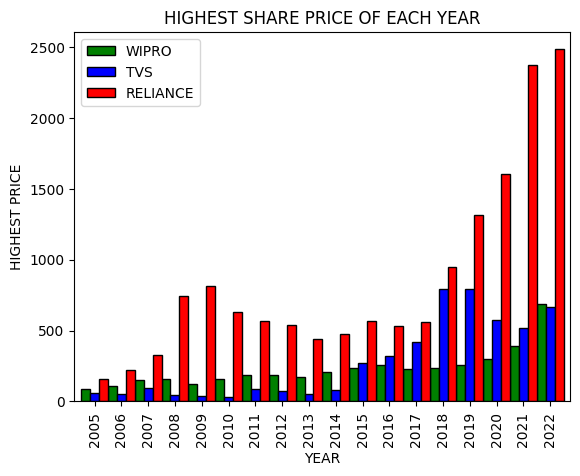

In this graph, we show the HIGHEST PRICE of the three companies.According to this graph RELIANCE has a consistent increase in their prices followed by TVS and WIPRO respectively. 


In [37]:

dfg.plot(x="YEAR", y=["WIPRO","TVS","RELIANCE"],kind='bar',xlabel='YEAR',ylabel='HIGHEST PRICE',color=['green','blue','red'],width=1.0,title='HIGHEST SHARE PRICE OF EACH YEAR',edgecolor='black')
#ticks=dfg.index.tolist()
#plt.xticks(ticks,dfg.YEAR,rotation=90)
plt.show()
print('In this graph, we show the HIGHEST PRICE of the three companies.According to this graph RELIANCE has a consistent increase in their prices followed by TVS and WIPRO respectively. ')


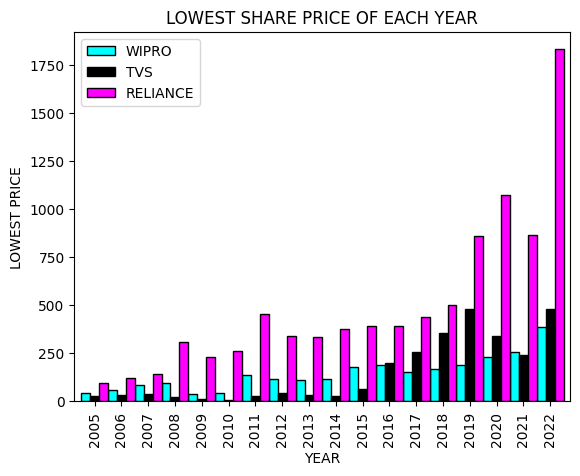

In this graph, we show the LOWEST PRICE of the three companies.According to this graph TVS has the lowest prices as compared to RELIANCE AND WIPRO. 


In [38]:
dfh.plot(x="YEAR", y=["WIPRO","TVS","RELIANCE"],kind='bar',xlabel='YEAR',ylabel='LOWEST PRICE',color=['cyan','black','magenta'],width=1.0,title='LOWEST SHARE PRICE OF EACH YEAR',edgecolor='black')
#ticks=dfh.index.tolist()
#plt.xticks(ticks,dfh.YEAR,rotation=90)
plt.show()
print('In this graph, we show the LOWEST PRICE of the three companies.According to this graph TVS has the lowest prices as compared to RELIANCE AND WIPRO. ')


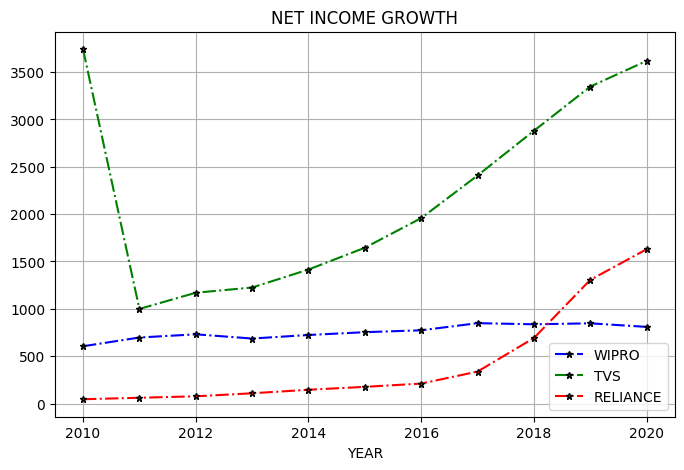

In this plot, we show the net income growth of each company from March 2010 to March 2020. TVS industries shows steeper growth than WIPRO and RELIANCE during this period.


In [39]:
dfc.plot(kind='line',title='NET INCOME GROWTH',x='YEAR',y=['WIPRO','TVS','RELIANCE'],color=['blue','green','red'], grid=True,marker='*',markeredgecolor='k',markersize=5,linestyle='dashdot',figsize=(8,5))
#ticks=dfc.index.tolist()
#plt.xticks(ticks,dfc.YEAR,rotation=90)
plt.show()
print('In this plot, we show the net income growth of each company from March 2010 to March 2020. TVS industries shows steeper growth than WIPRO and RELIANCE during this period.')

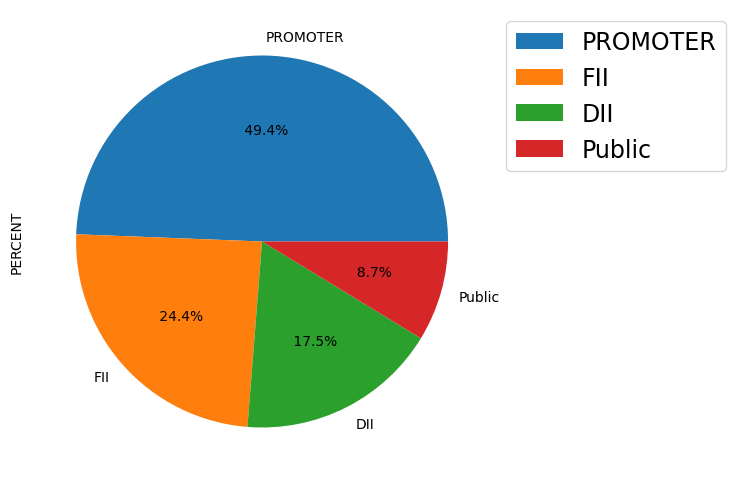

In this pie chart, we show the percentage of shares of Reliance Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the financial year of 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by Public.


In [40]:
dfd.plot(kind='pie',y='PERCENT',autopct="%5.1f%%",figsize=(6,8))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5,0.5,0.5),fontsize=17)
plt.show()
print('In this pie chart, we show the percentage of shares of Reliance Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the financial year of 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by Public.')


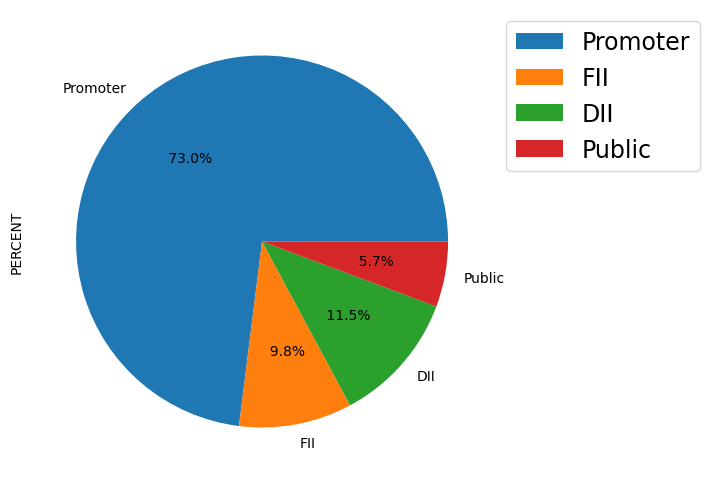

In this pie chart, we show the percentage of shares of WIPRO Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the financial yaer of 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by Public.


In [41]:
dfe.plot(kind='pie',y='PERCENT',autopct="%5.1f%%",figsize=(6,8))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5,0.5,0.5),fontsize=17)
plt.show()
print('In this pie chart, we show the percentage of shares of WIPRO Industries bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the financial yaer of 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by Public.')

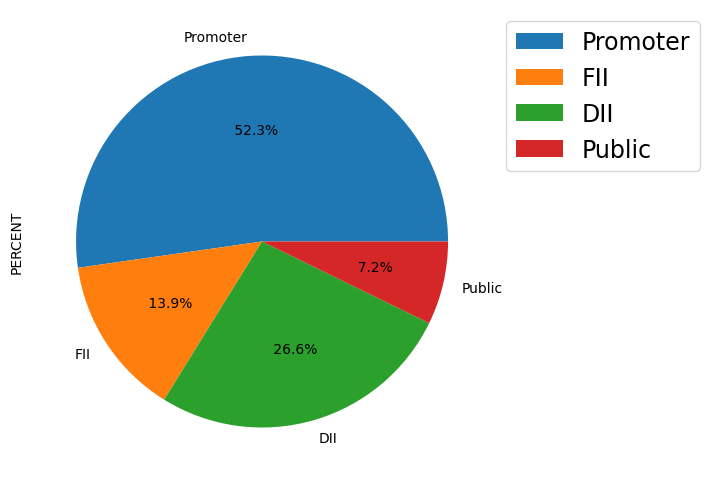

In this pie chart, we show the percentage of shares of TVS bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the financial year of 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by General Public.


In [42]:
dff.plot(kind='pie',y='PERCENT',autopct="%5.1f%%",figsize=(6,8))
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5,0.5,0.5),fontsize=17)
plt.show()
print('In this pie chart, we show the percentage of shares of TVS bought by different sectors like Promoter, Foreign Institutional Investor (FII), Domestic Institutional Investor (DII) and Public during the financial year of 2023. The maximum no. of shares are bought by the Promoter and the minimum no. by General Public.')


In [ ]:
"""import pandas as pd
df=pd.read_csv("C:\\Users\\Samrudhi\\Desktop\\PP Project\\CSV files_3\\GROWTH.csv")
import matplotlib.pyplot as plt
df.plot(kind='line',title='NET INCOME GROWTH',xlabel='DATE',ylabel='INCOME',color=['blue','green','red','magenta','cyan','orange'], grid=True,marker='*',markeredgecolor='k',markersize=5,linestyle='dashdot',figsize=(8,5))
ticks=df.index.tolist()
plt.xticks(ticks,df.DATE,rotation=90)
plt.show()
print('In this plot, we show the net income growth of each company from March 2005 to March 2022.')"""